# Predictions

We are going to use the first results of the first matchdays of 2022/2023.

In [1]:
import pandas as pd
import numpy as npy

import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

In [2]:
def func(pct):
    return "{:1.1f}%".format(pct)

In [3]:
from functions import *

In [4]:
con = sqlite3.connect('football-data.sqlite')

In [5]:
dict_teams = {
    'Almería': {
        'name': 'Almería',
        'fullname': 'Unión Deportiva Almería, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/1564.png'},
    'Athletic': {
        'name': 'Athletic',
        'fullname': 'Athletic Club',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/174.png'},
    'Atlético': {
        'name': 'Atlético',
        'fullname': 'Club Atlético de Madrid, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/175.png'},
    'Barcelona': {
        'name': 'Barcelona',
        'fullname': 'Fútbol Club Barcelona',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/178.png'},
    'Betis': {
        'name': 'Betis',
        'fullname': 'Betis Deportivo Balompié',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/185.png'},
    'Cádiz': {
        'name': 'Cádiz',
        'fullname': 'Cádiz Club de Fútbol, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/1737.png'},
    'Celta': {
        'name': 'Celta',
        'fullname': 'Real Club Celta, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/176.png'},
    'Elche': {
        'name': 'Elche',
        'fullname': 'Elche Club de Fútbol, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/954.png'},
    'Espanyol': {
        'name': 'Espanyol',        
        'fullname': 'Real Club Deportivo Espanyol, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/177.png'},
    'Getafe': {
        'name': 'Getafe',
        'fullname': 'Getafe Club de Fútbol, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/1450.png'},
    'Girona': {
        'name': 'Girona',
        'fullname': 'Girona Fútbol Club, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/2893.png'},
    'Mallorca': {
        'name': 'Mallorca',
        'fullname': 'Real Club Deportivo Mallorca, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/181.png'},
    'Osasuna': {
        'name': 'Osasuna',
        'fullname': 'Club Atlético Osasuna',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/450.png'},
    'Rayo': {
        'name': 'Rayo',
        'fullname': 'Rayo Vallecano, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/184.png'},
    'Real Madrid': {
        'name': 'Real Madrid',
        'fullname': 'Real Madrid Club de Fútbol',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/186.png'},
    'Real Sociedad': {
        'name': 'Real Sociedad',
        'fullname': 'Real Sociedad de Fútbol S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/188.png'},
    'Sevilla': {
        'name': 'Sevilla',
        'fullname': 'Sevilla Fútbol Club, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/179.png'},
    'Valencia': {
        'name': 'Valencia',
        'fullname': 'Valencia Fútbol Club',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/191.png'},
    'Valladolid': {
        'name': 'Valladolid',
        'fullname': 'Real Valladolid Club de Fútbol, S.A.D.',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/192.png'},  
    'Villarreal': {
        'name': 'Villarreal',
        'fullname': 'Villarreal Club de Fútbol, S.A.D',
        'shield': 'https://e00-marca.uecdn.es/assets/sports/logos/football/png/72x72/449.png'}}

In [6]:
data_jornada = \
pd.read_sql_query(
    sql = """
    SELECT * FROM calendar2223
     WHERE Jornada LIKE 'Jornada 15';
     """,
    con = con)

try:
    data_jornada['Hg'] = [x.split('-')[0] for x in data_jornada['Resultado']]
    data_jornada['Ag'] = [x.split('-')[1] for x in data_jornada['Resultado']]
    data_jornada['FTR'] = [FTR(x,y) for x, y in zip(data_jornada['Hg'], data_jornada['Ag'])]
except:
    data_jornada['Hg'] = npy.nan
    data_jornada['Ag'] = npy.nan
    data_jornada['FTR'] = npy.nan

data_jornada

Jornada           Home    Resultado         Away  Hg  Ag  FTR
0  Jornada 15         Girona  29/12 17:00         Rayo NaN NaN  NaN
1  Jornada 15          Betis  29/12 19:15     Athletic NaN NaN  NaN
2  Jornada 15       Atlético  29/12 21:30        Elche NaN NaN  NaN
3  Jornada 15         Getafe  30/12 17:00     Mallorca NaN NaN  NaN
4  Jornada 15          Celta  30/12 19:15      Sevilla NaN NaN  NaN
5  Jornada 15          Cádiz  30/12 19:15      Almería NaN NaN  NaN
6  Jornada 15     Valladolid  30/12 21:30  Real Madrid NaN NaN  NaN
7  Jornada 15      Barcelona  31/12 14:00     Espanyol NaN NaN  NaN
8  Jornada 15  Real Sociedad  31/12 16:15      Osasuna NaN NaN  NaN
9  Jornada 15     Villarreal  31/12 16:15     Valencia NaN NaN  NaN

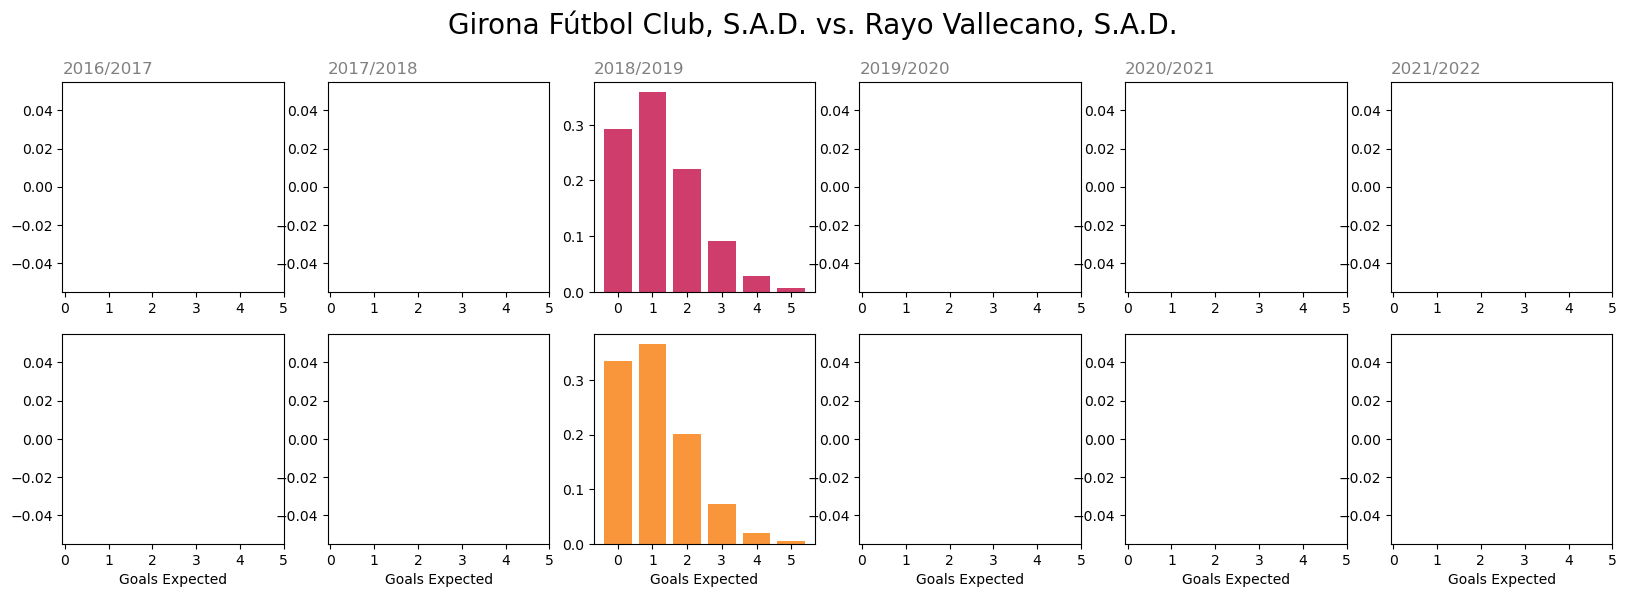

/home/ibon/anaconda3/envs/paper/lib/python3.7/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/ibon/anaconda3/envs/paper/lib/python3.7/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


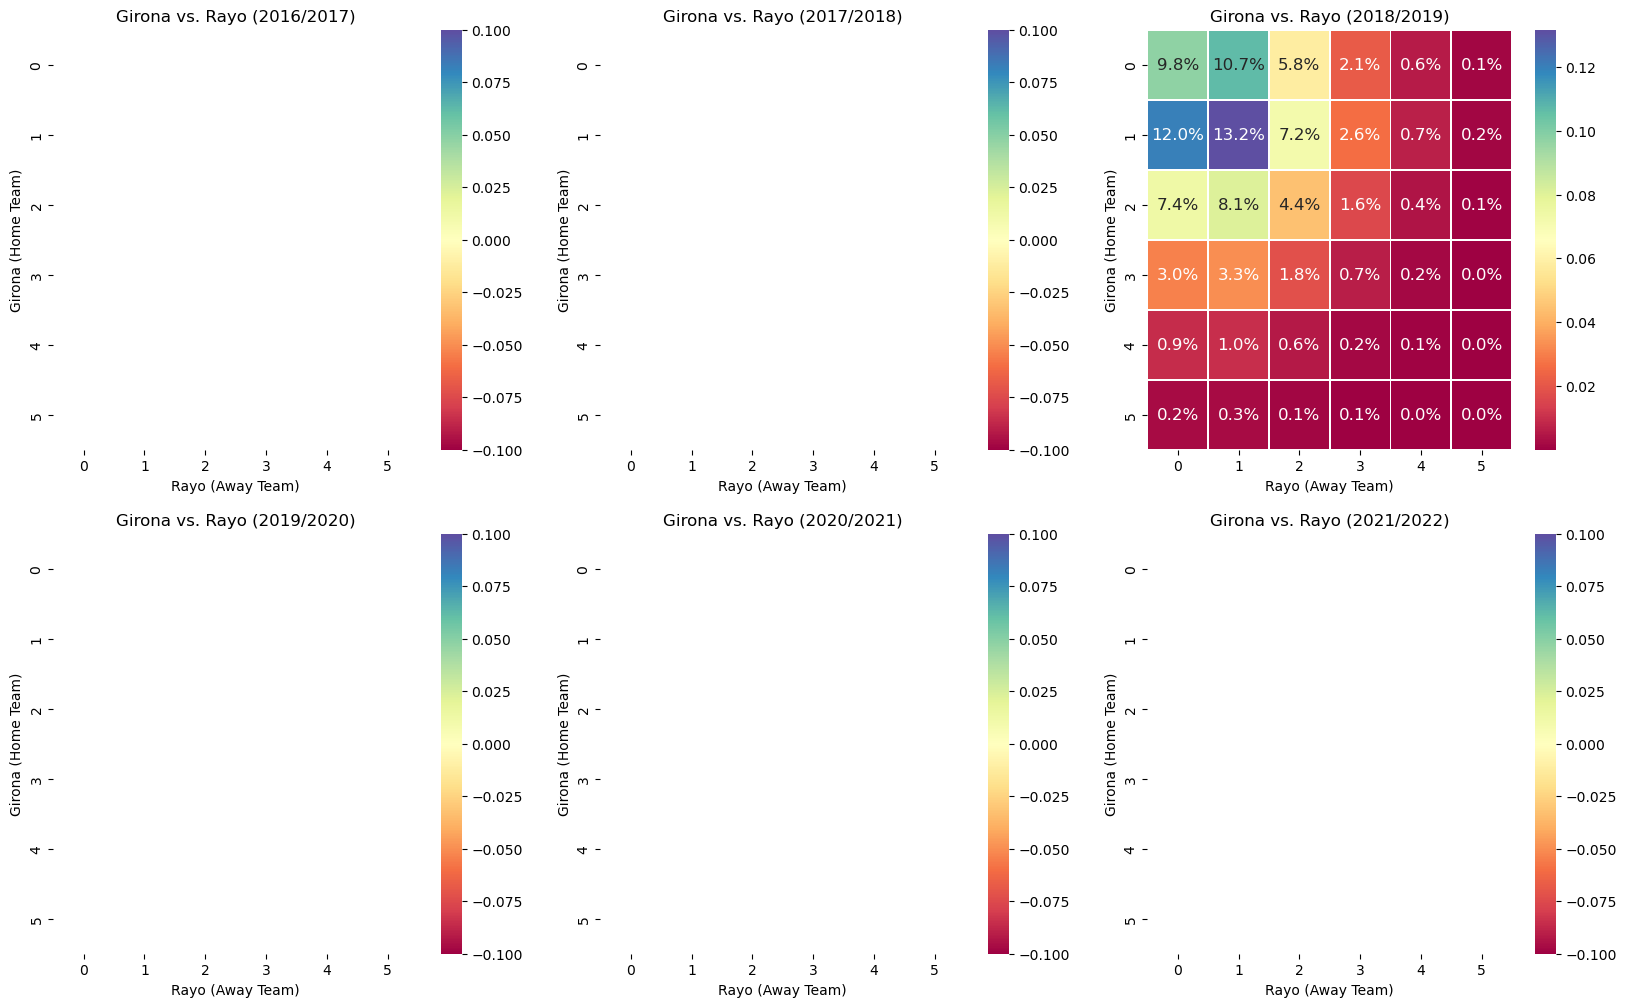

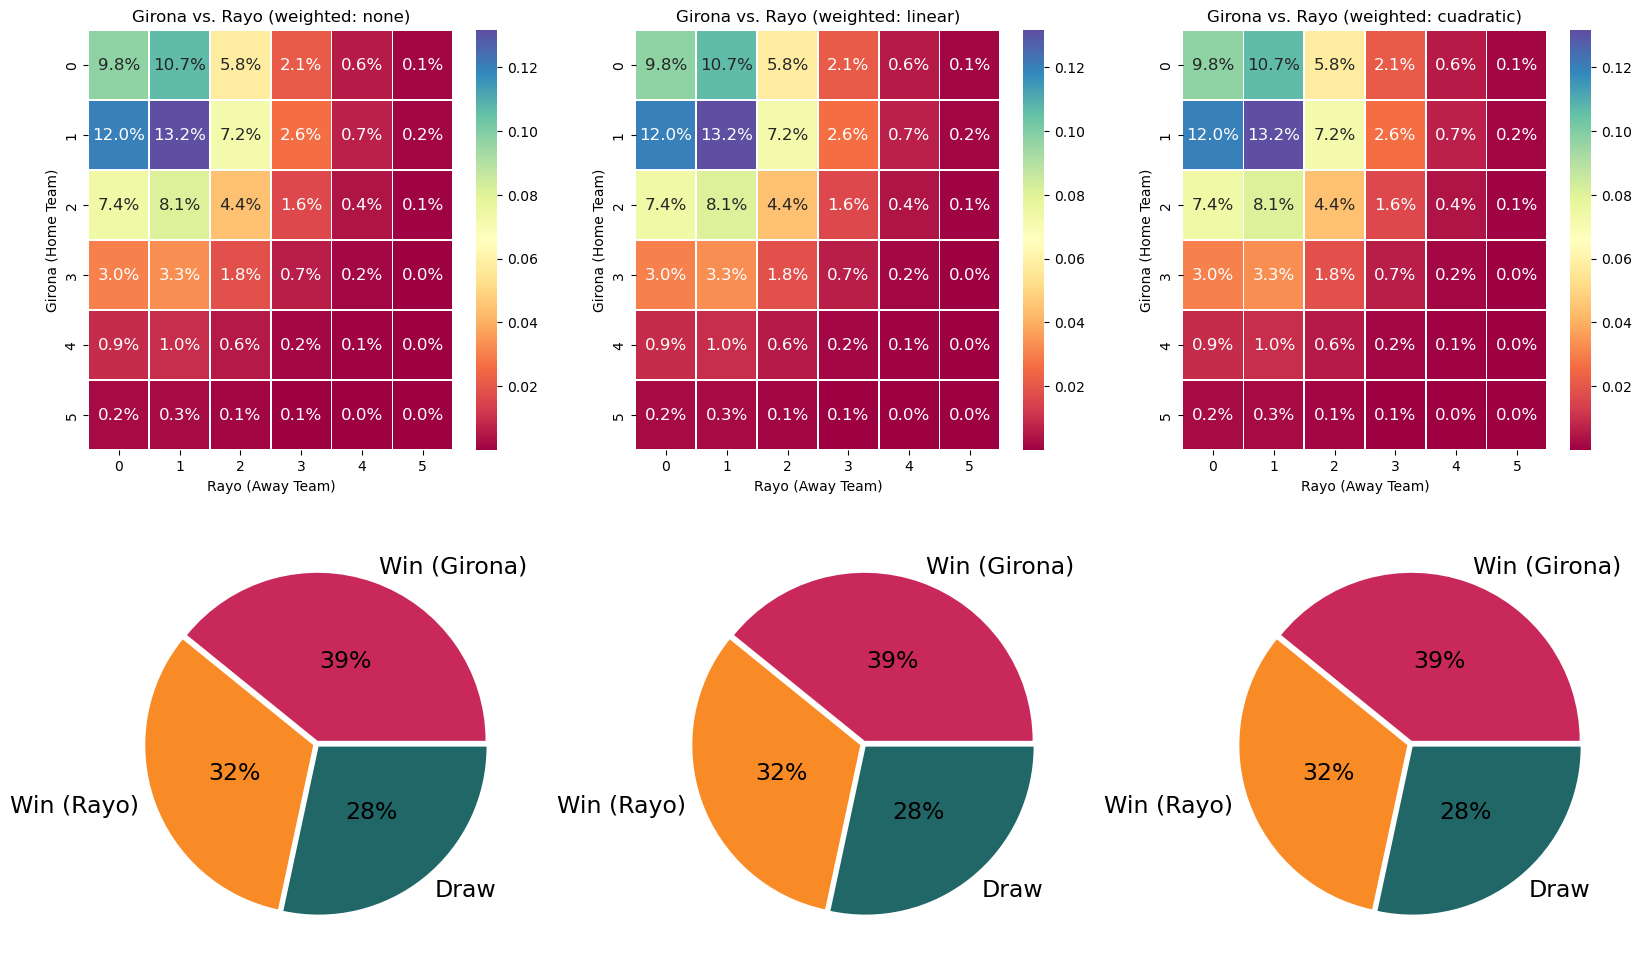

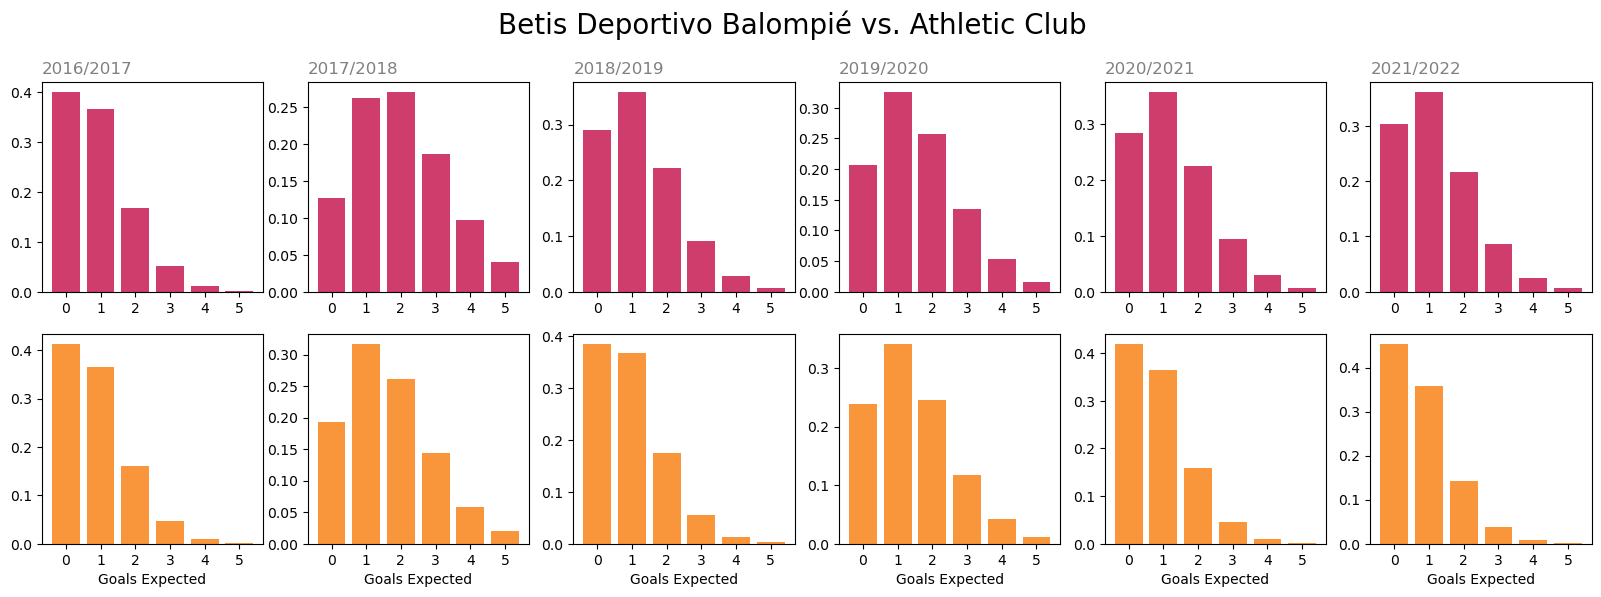

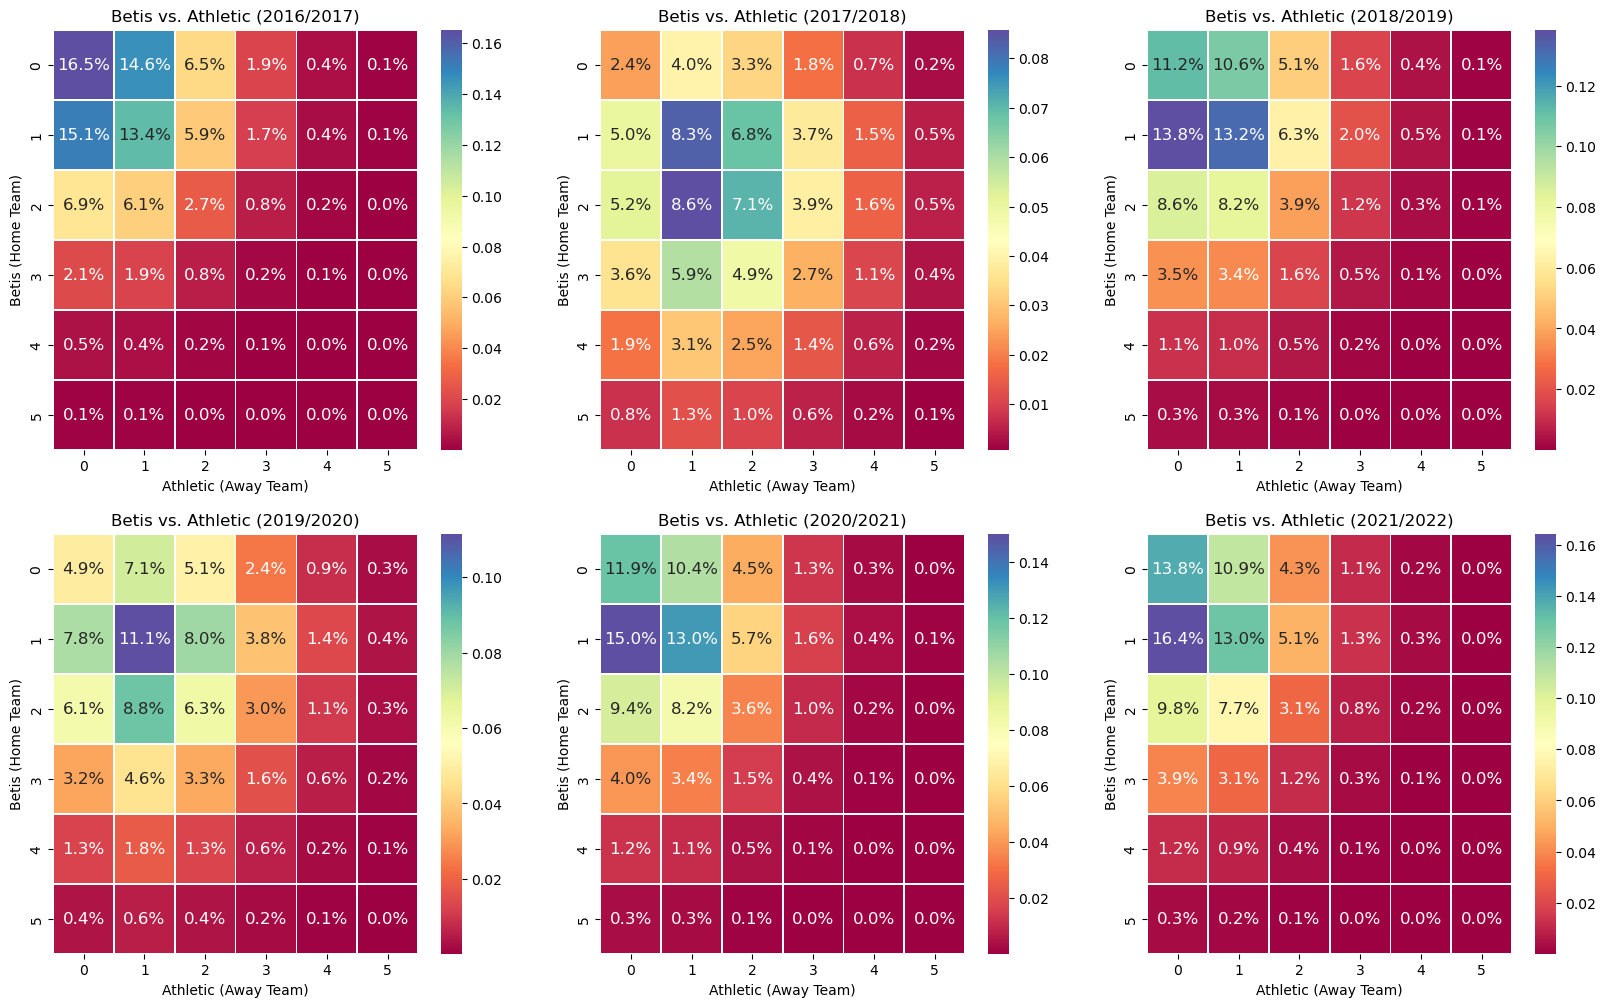

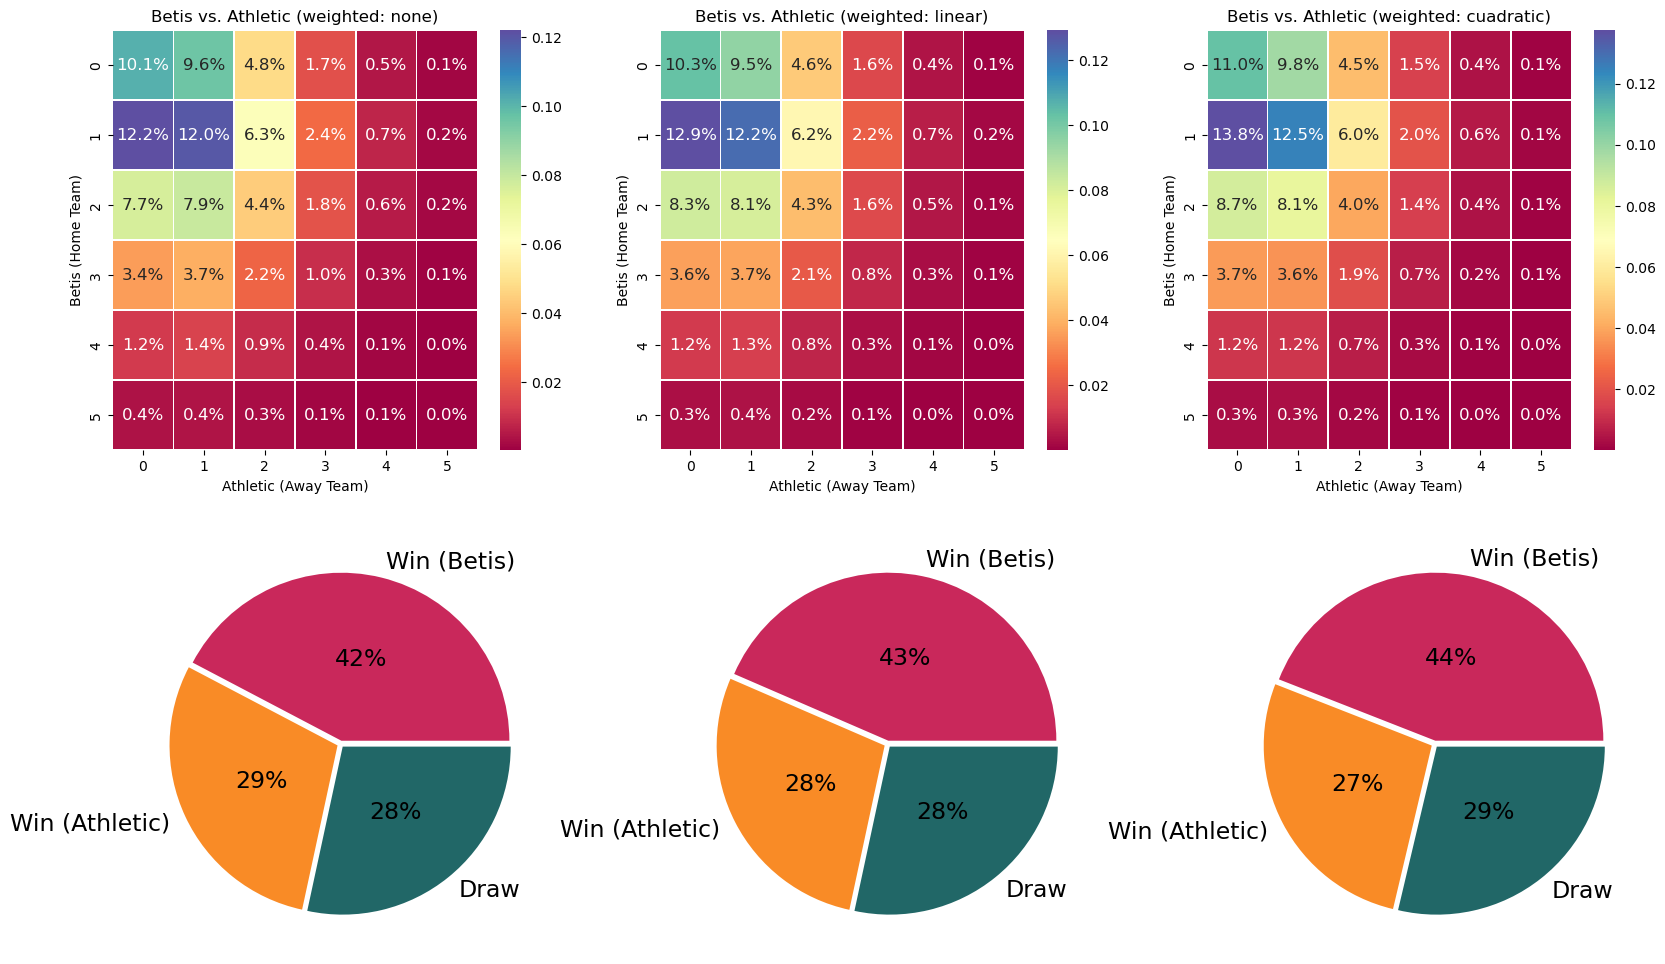

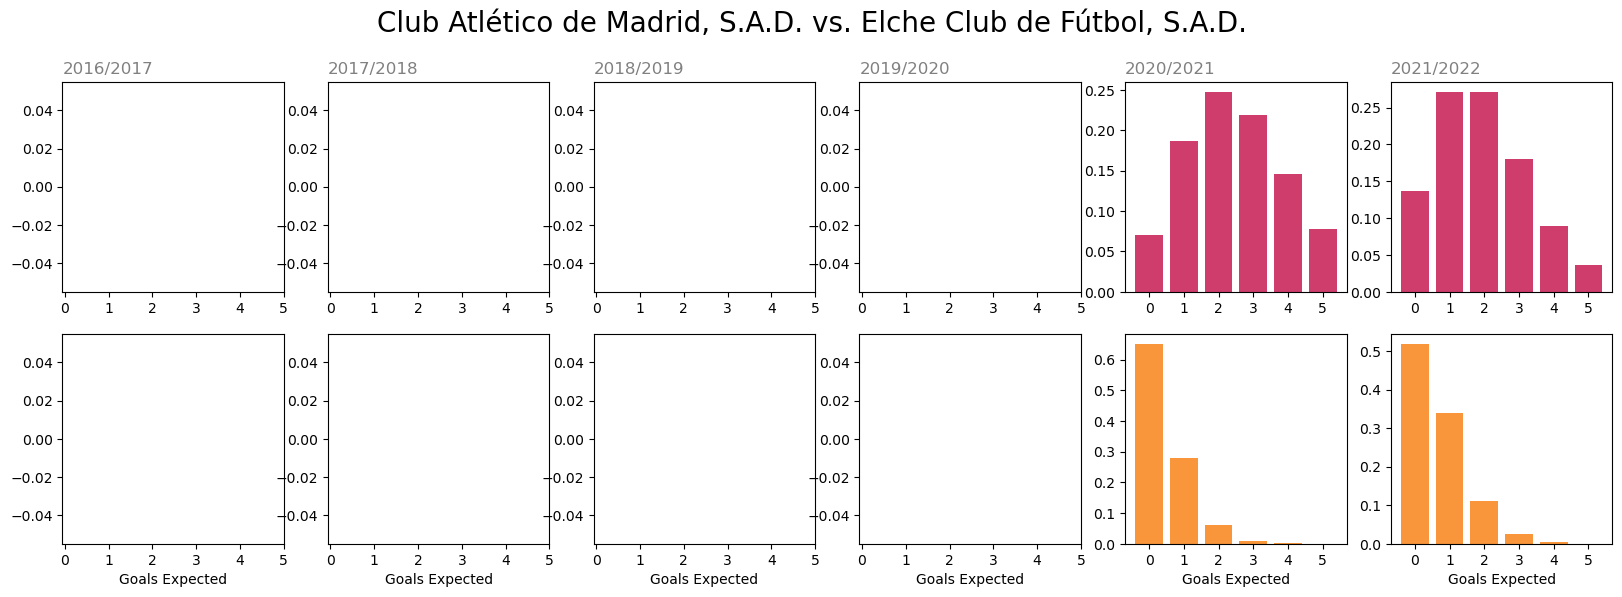

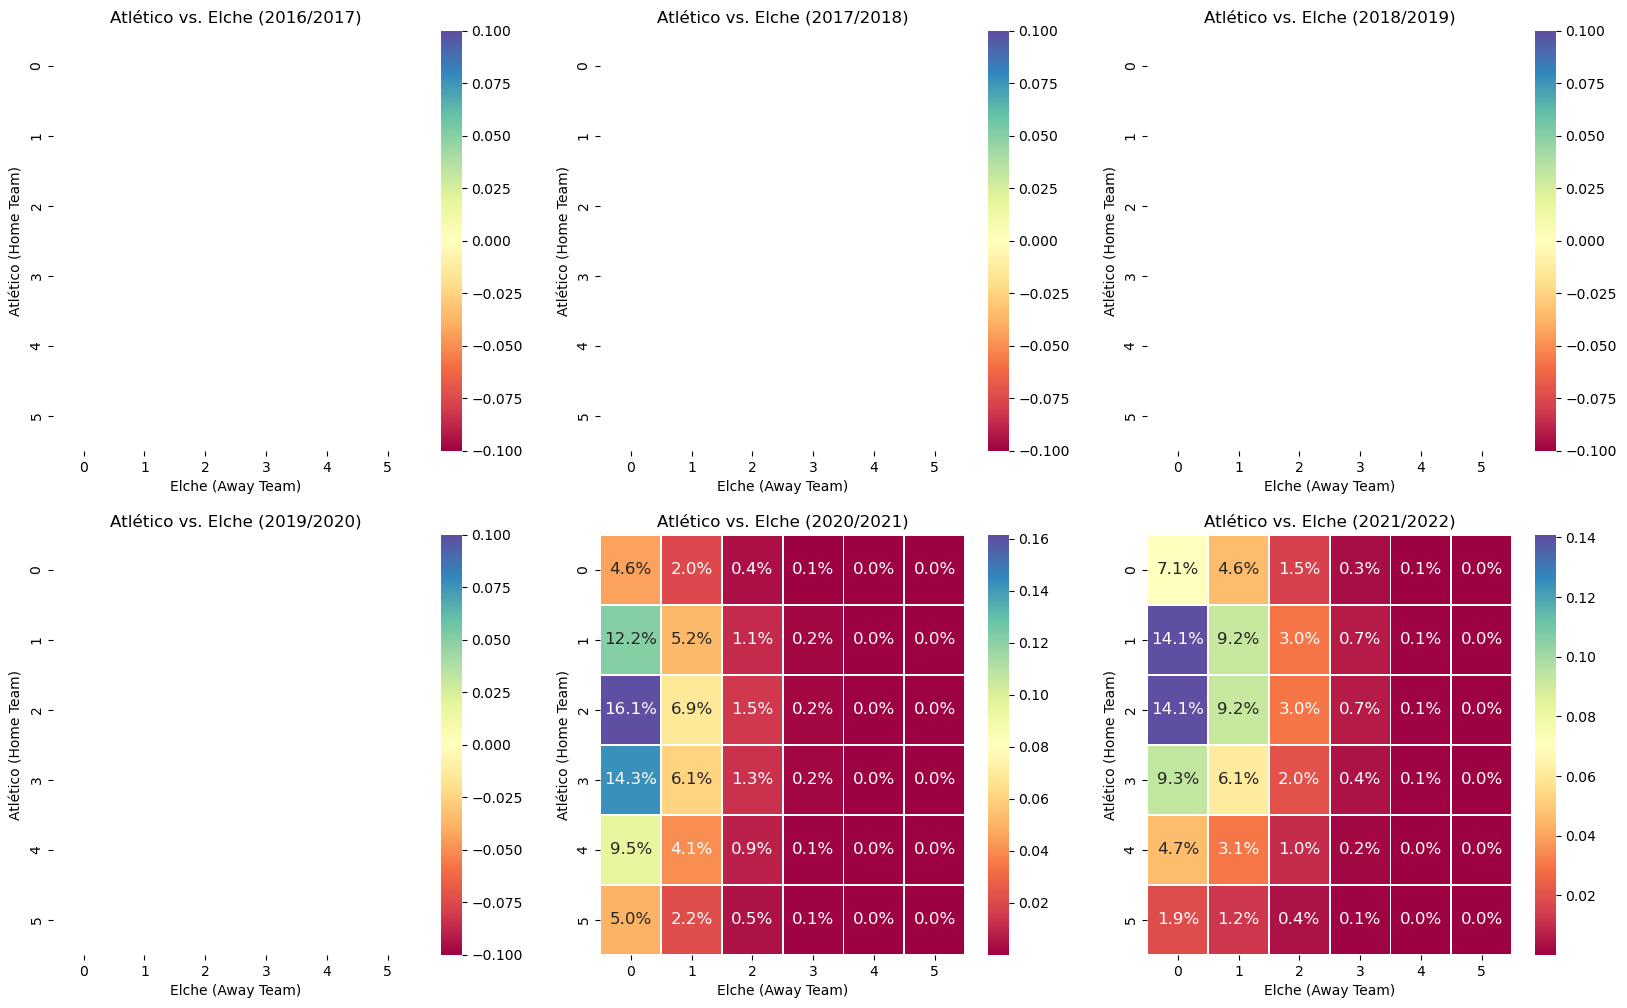

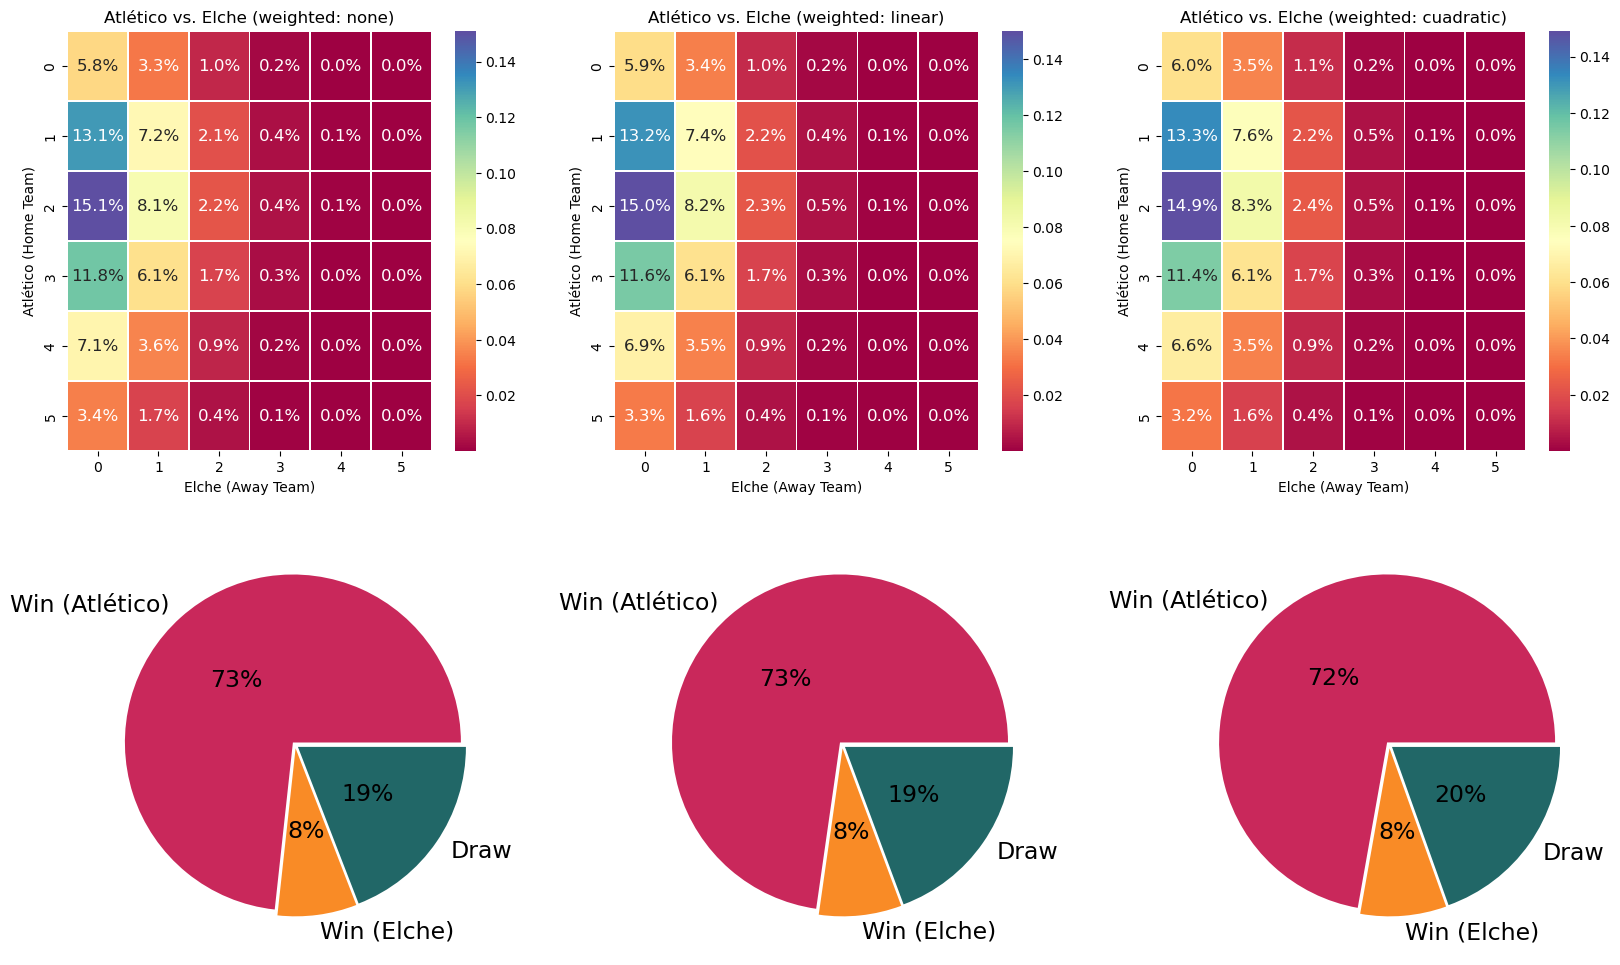

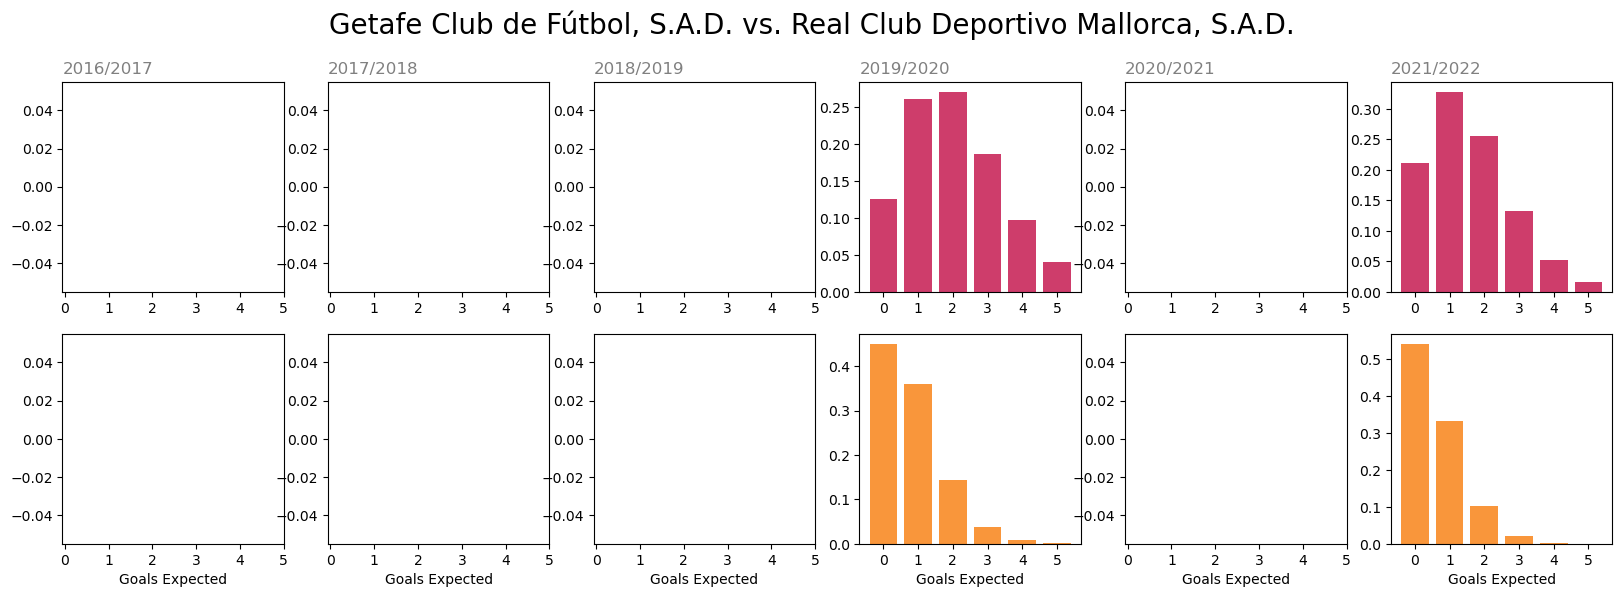

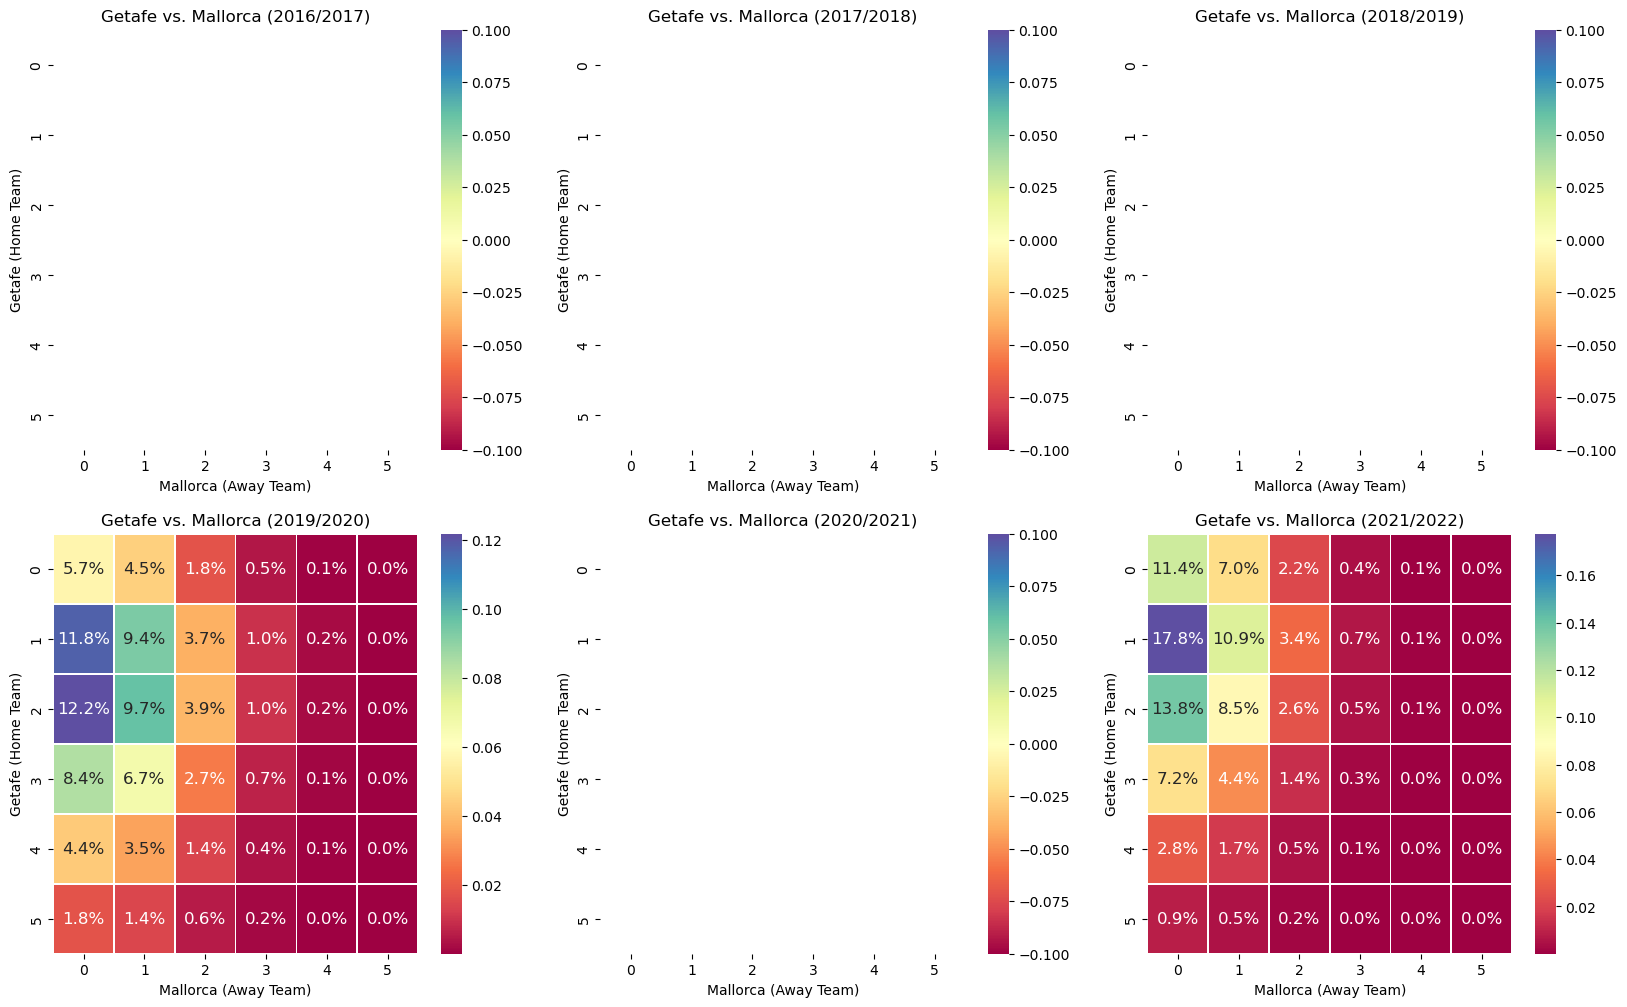

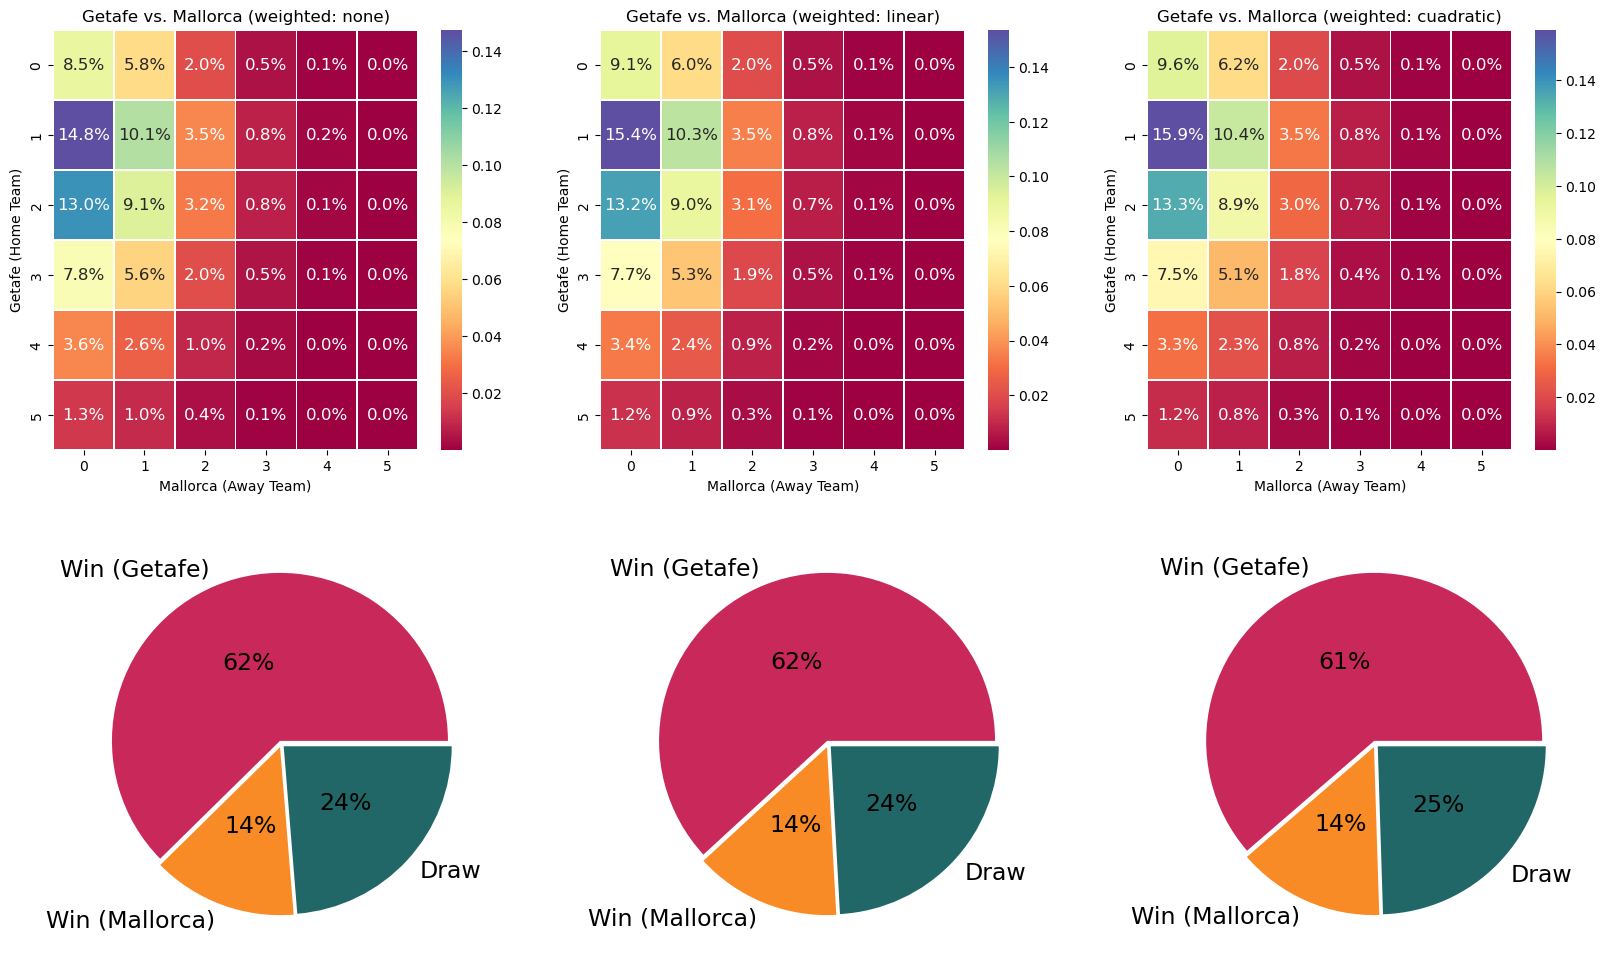

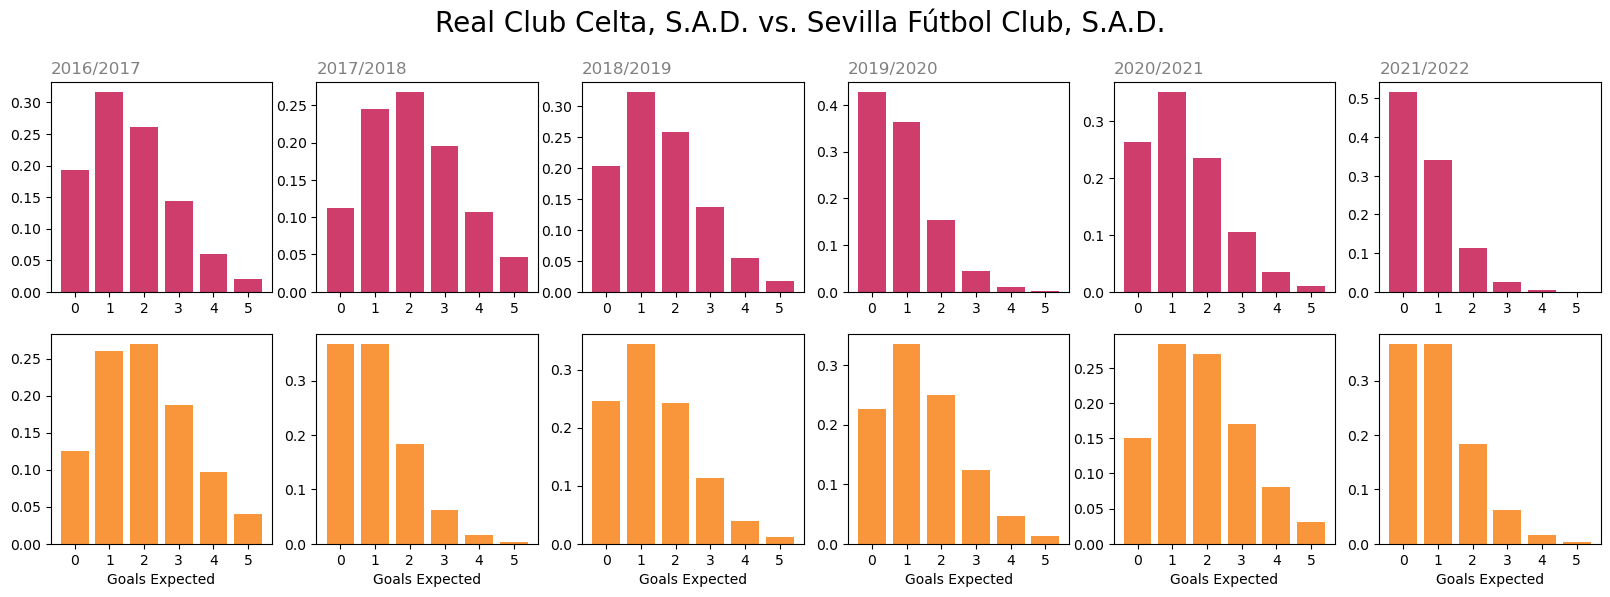

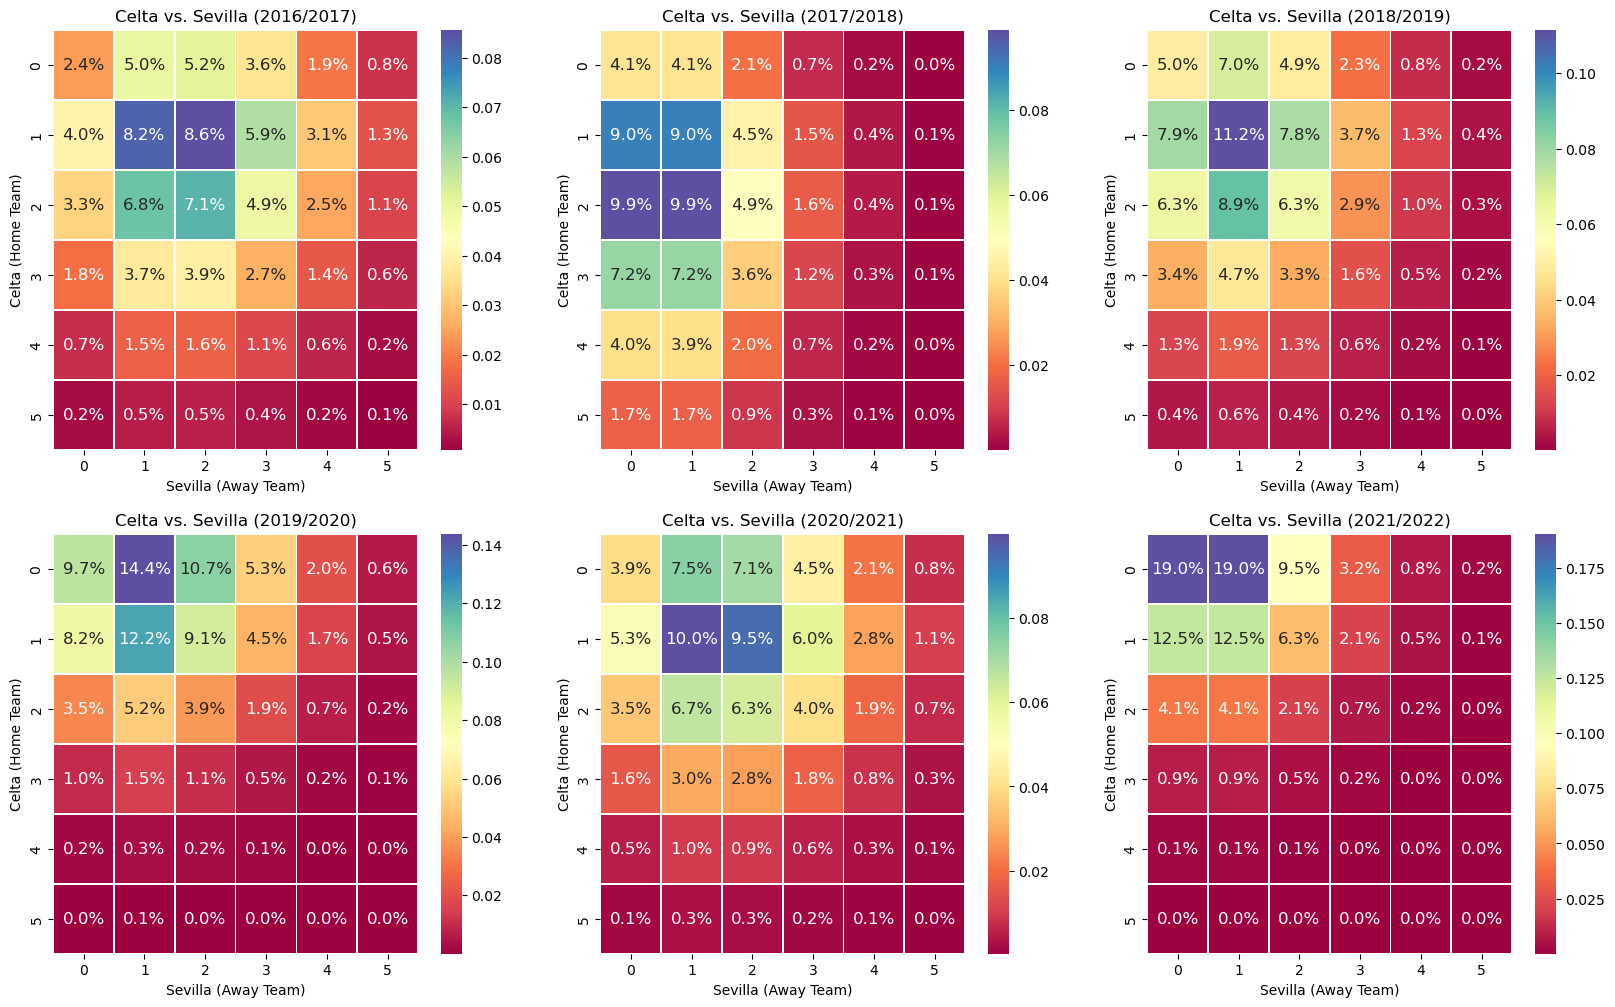

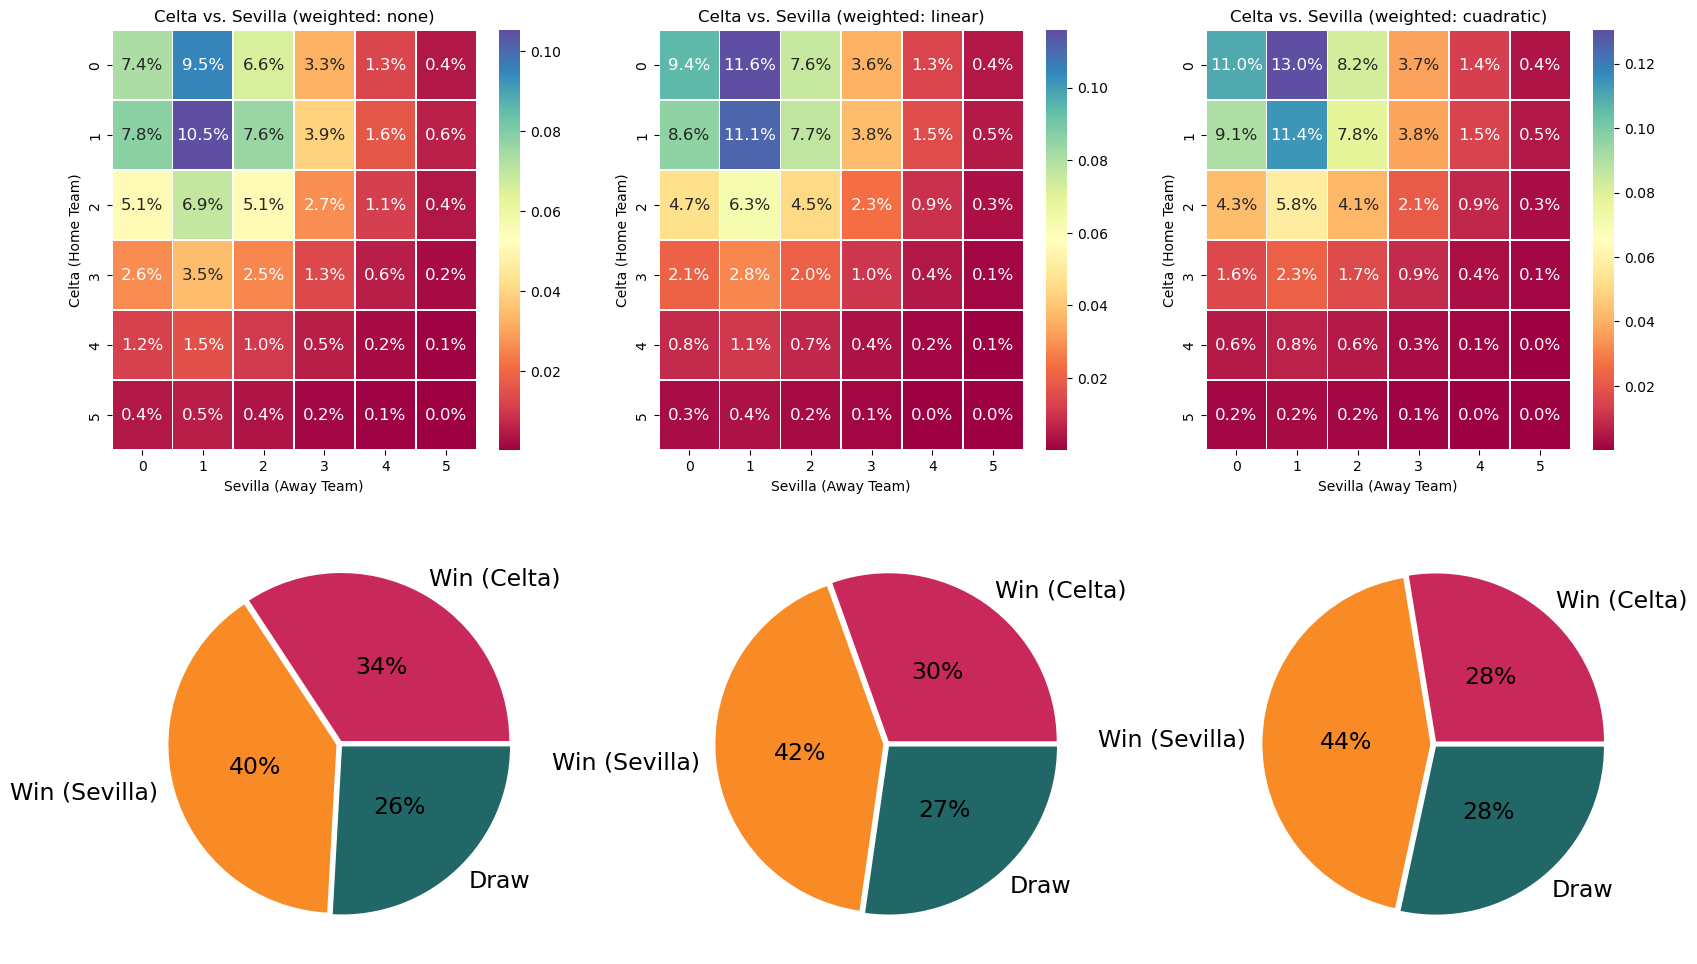

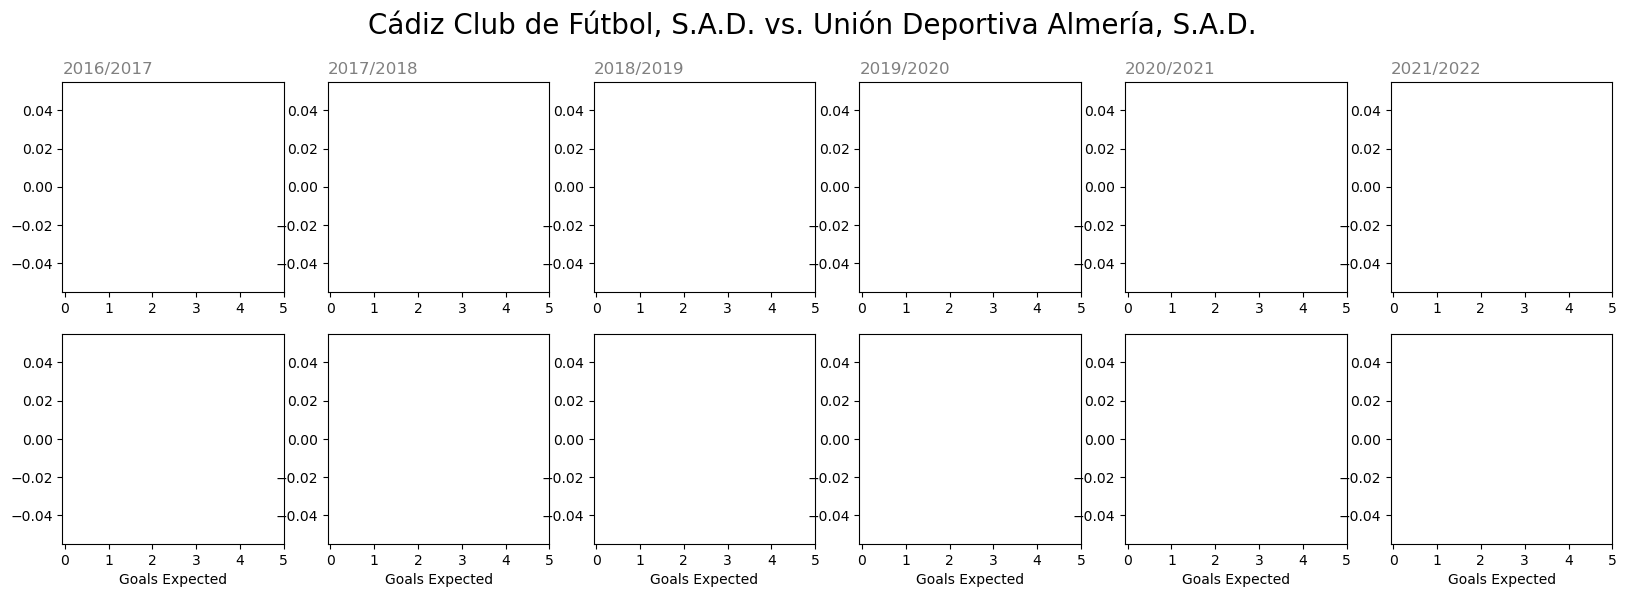

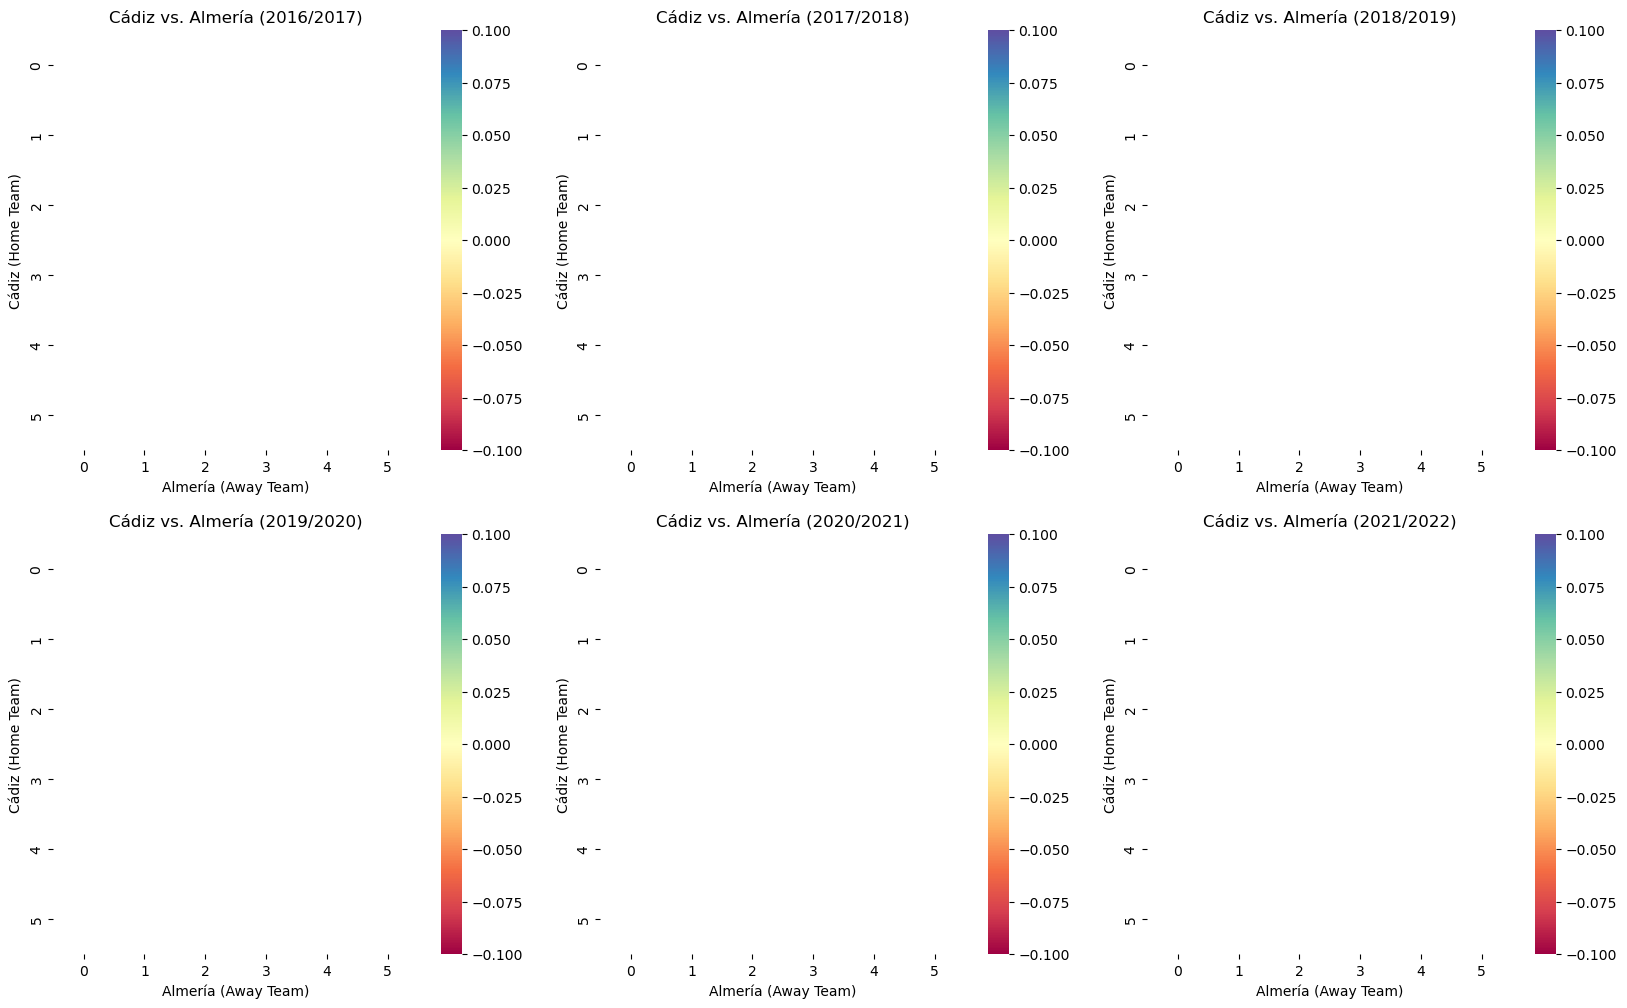

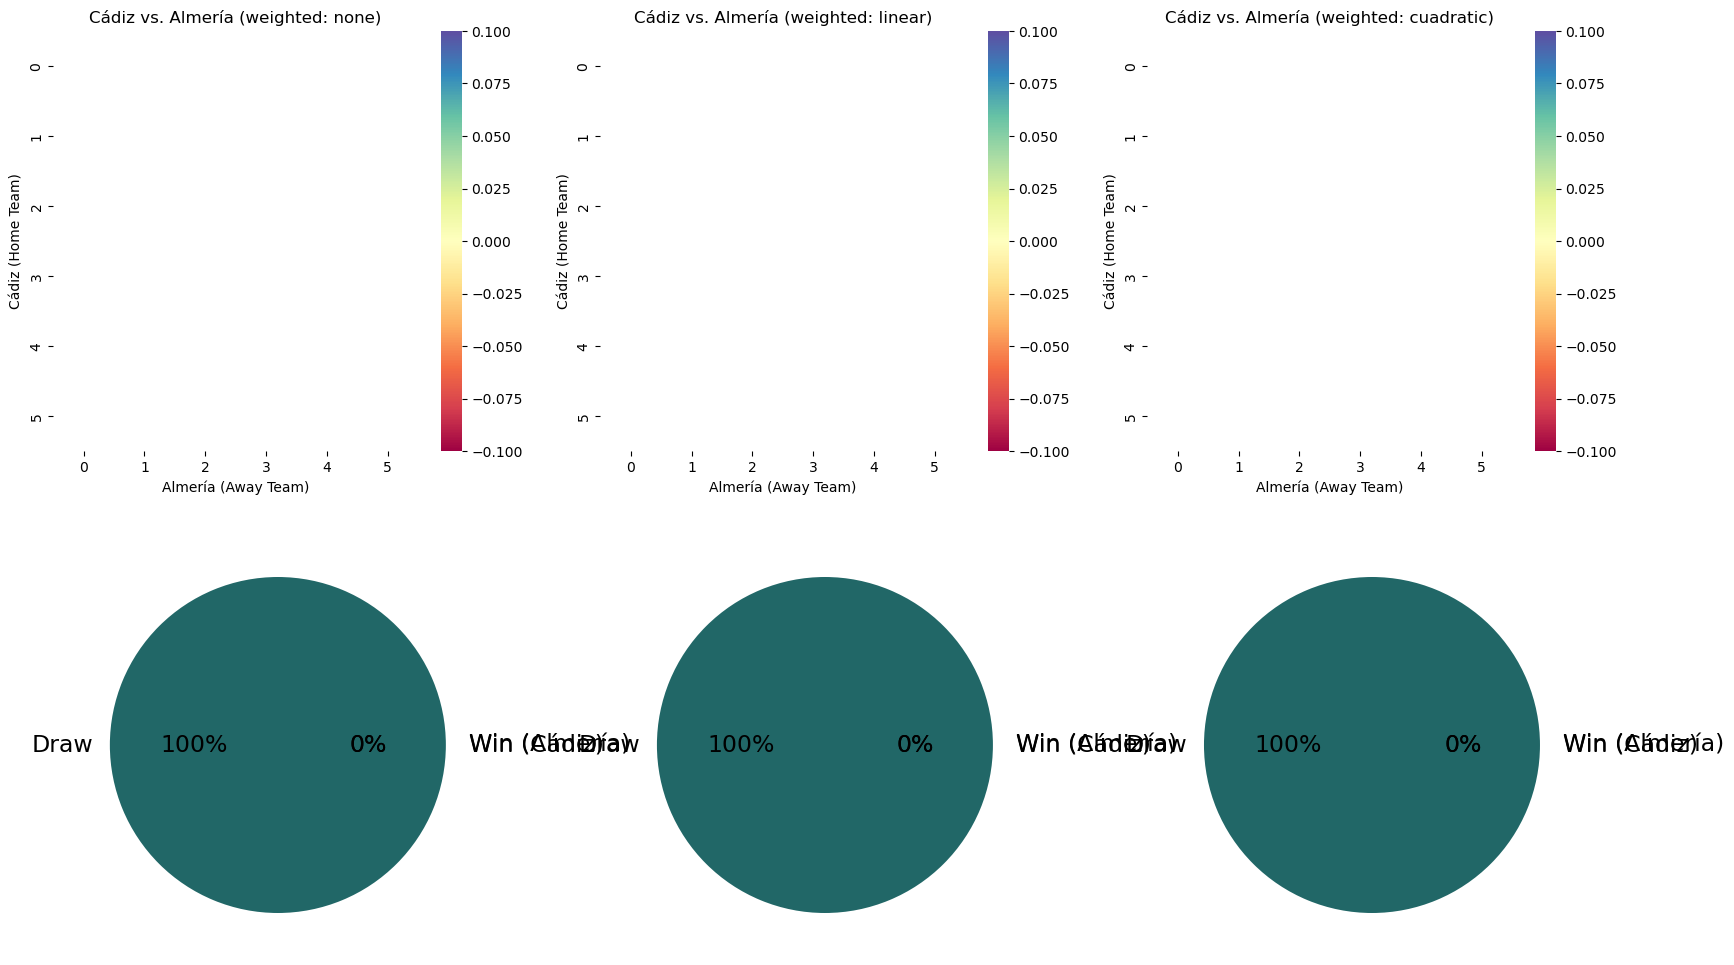

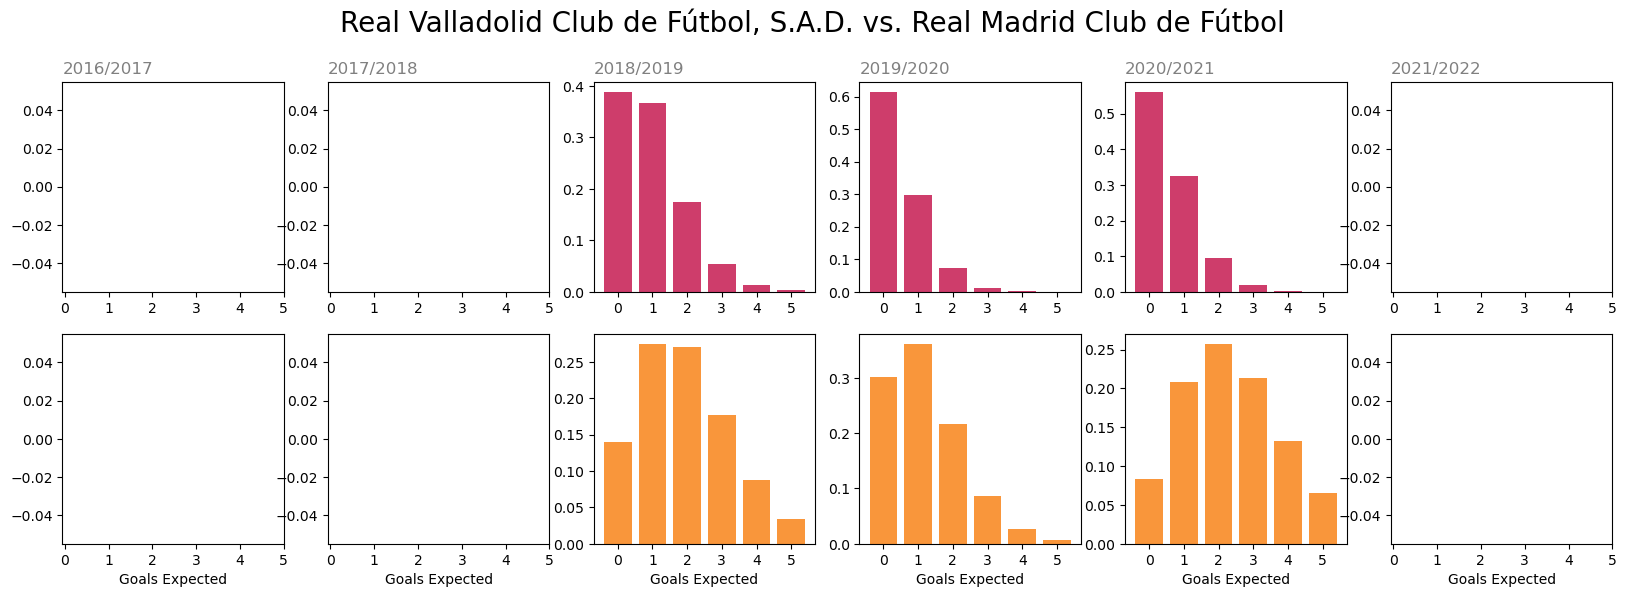

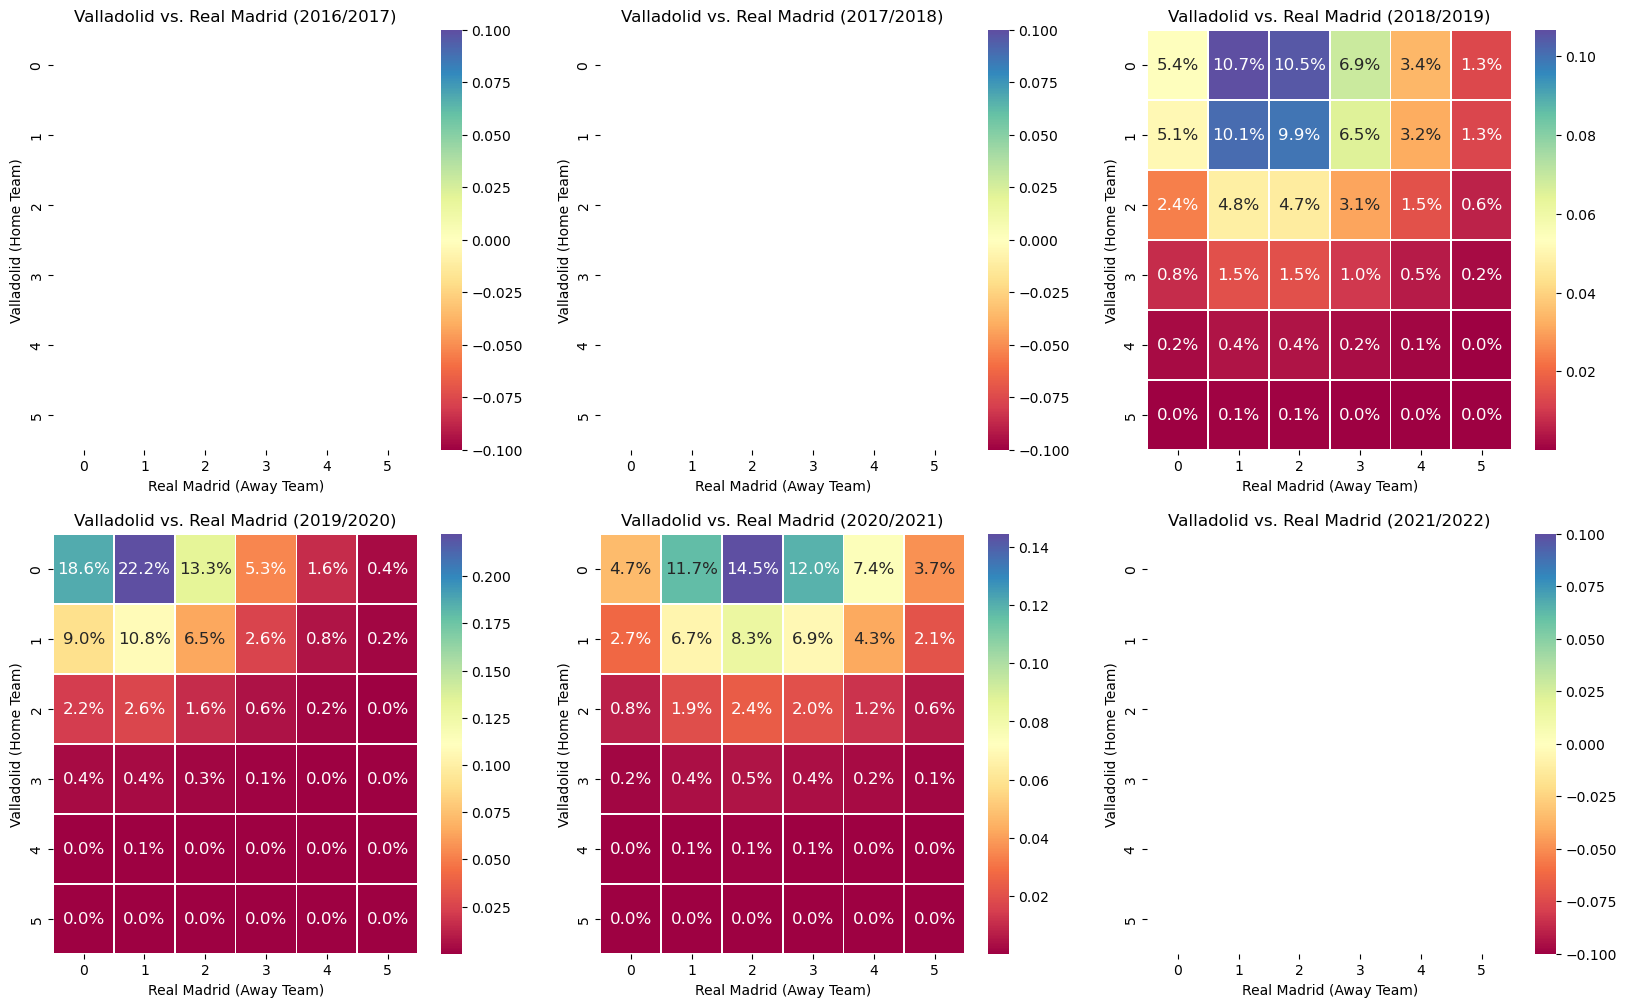

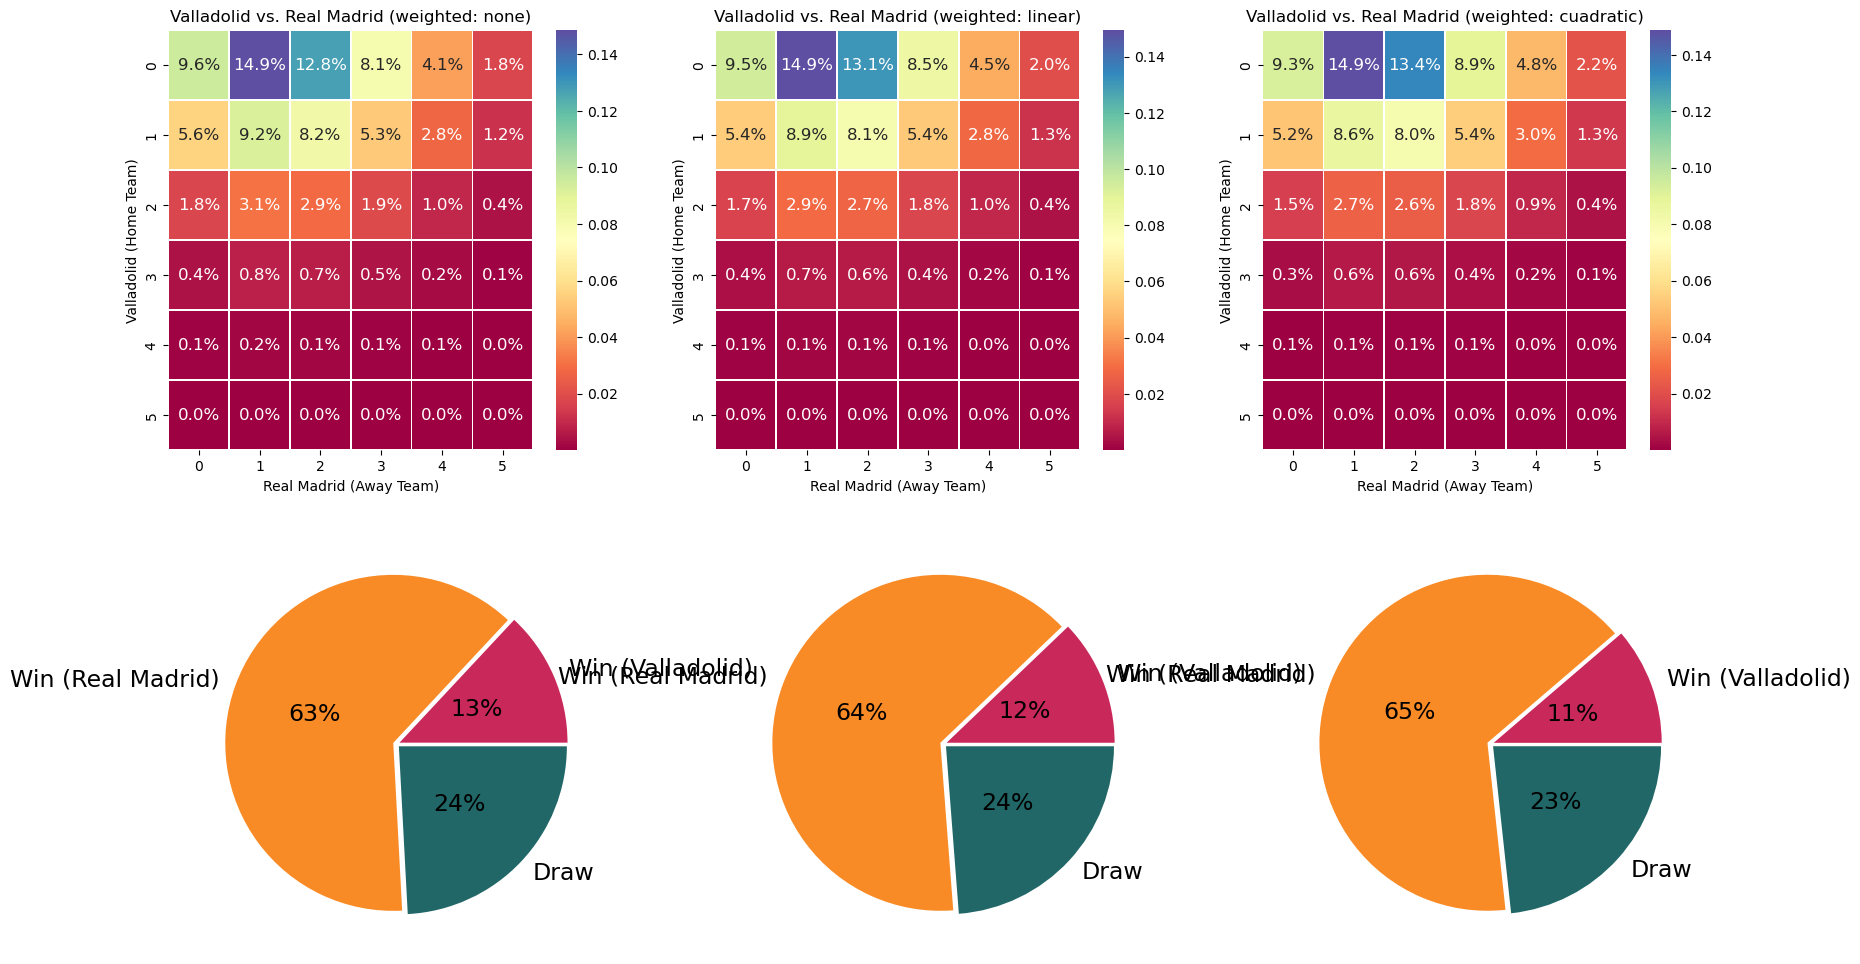

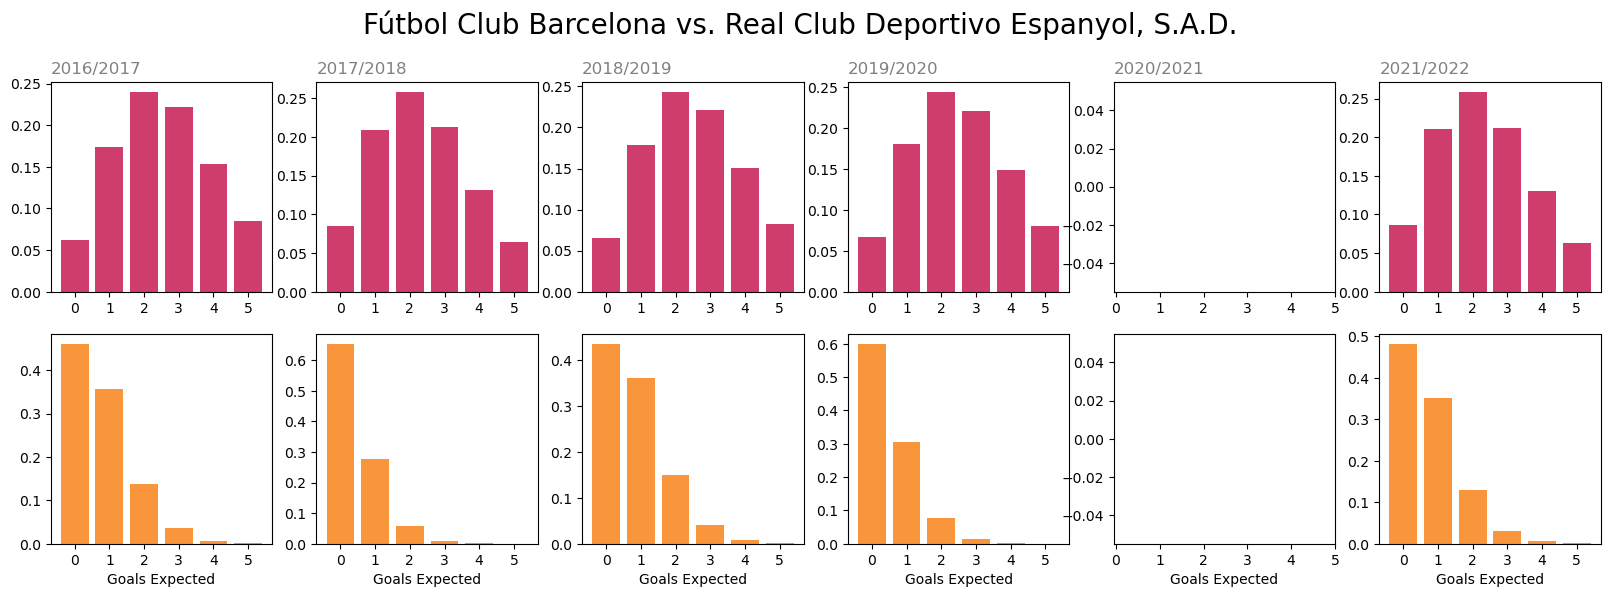

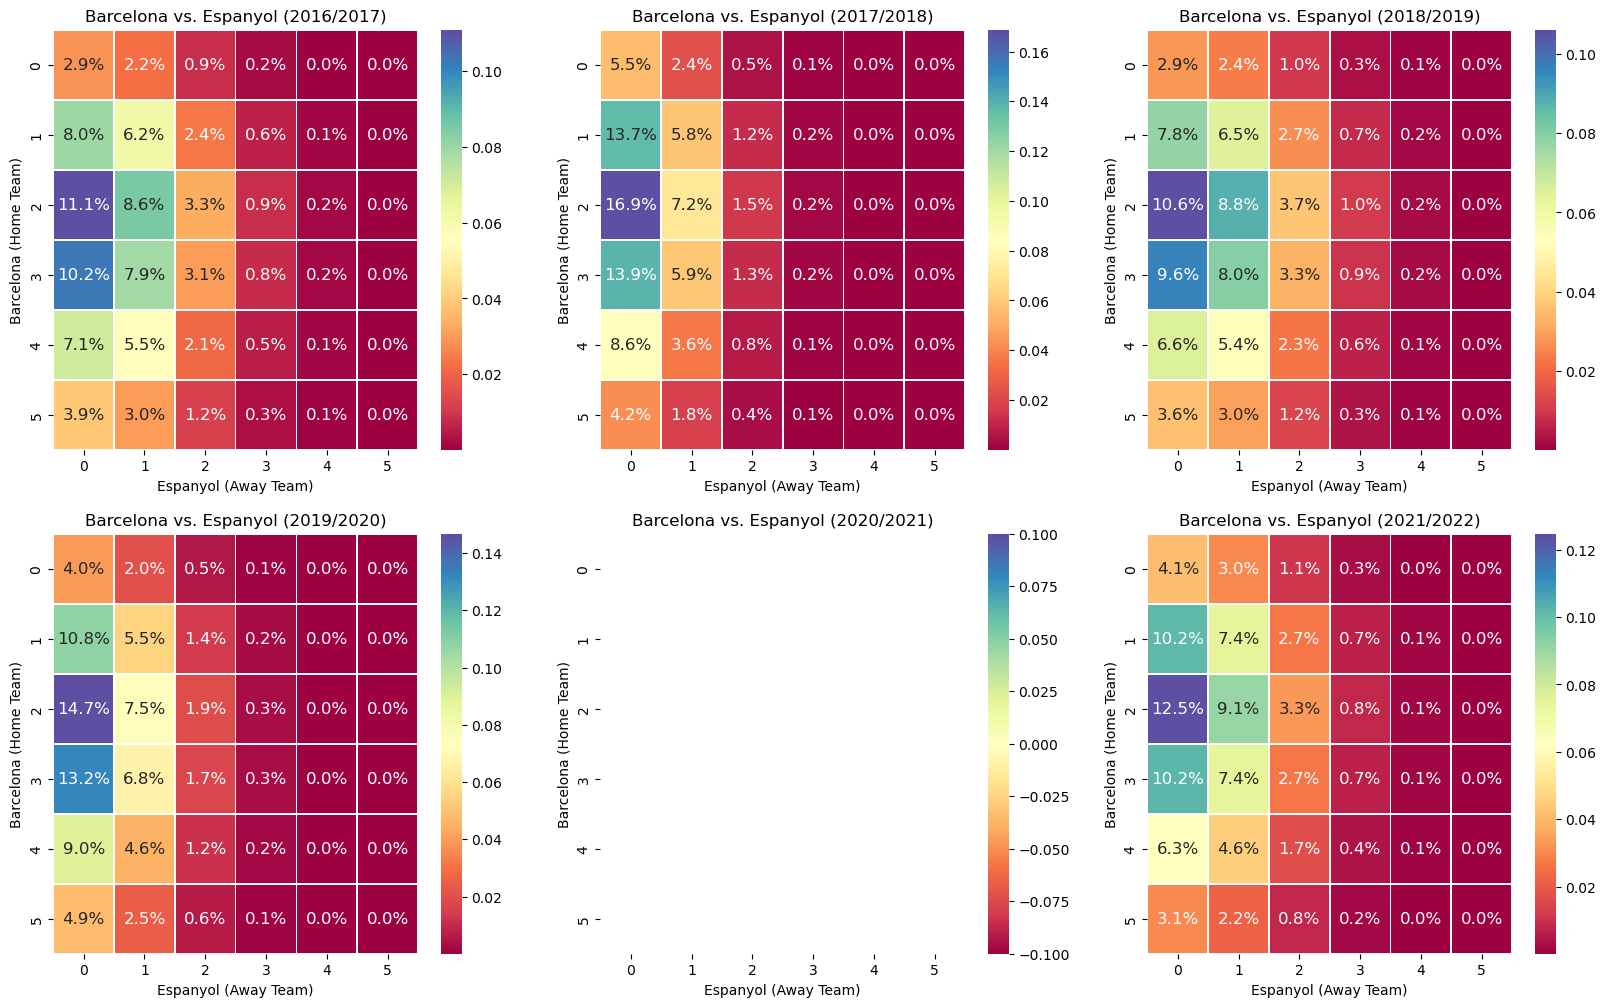

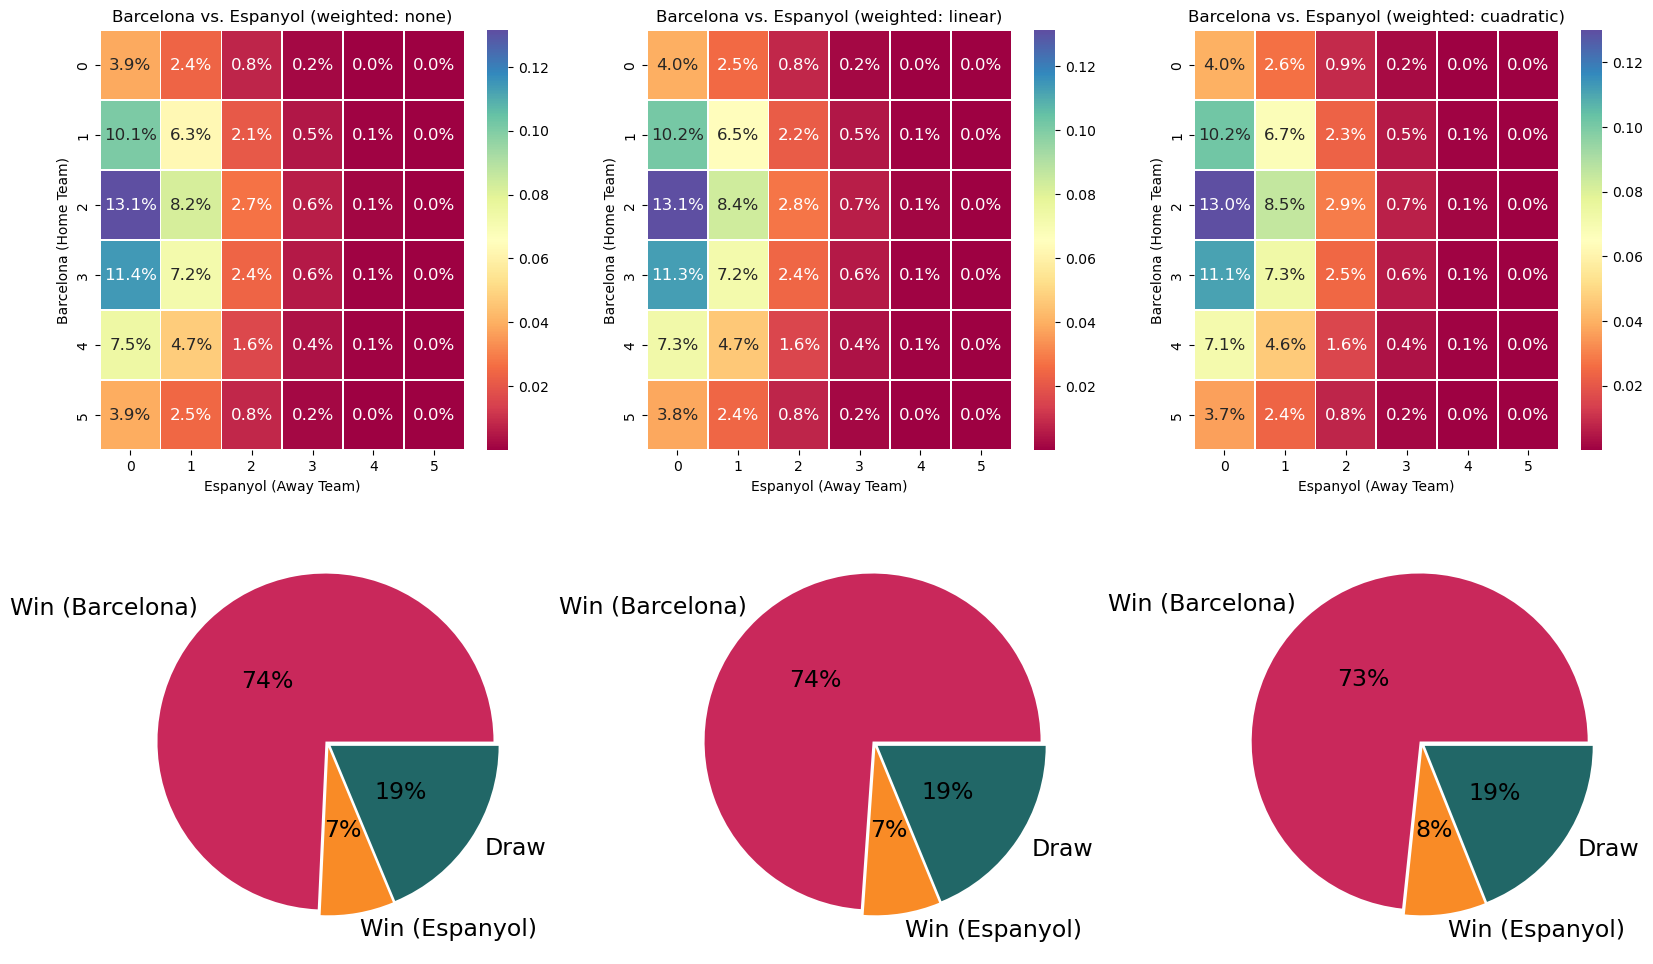

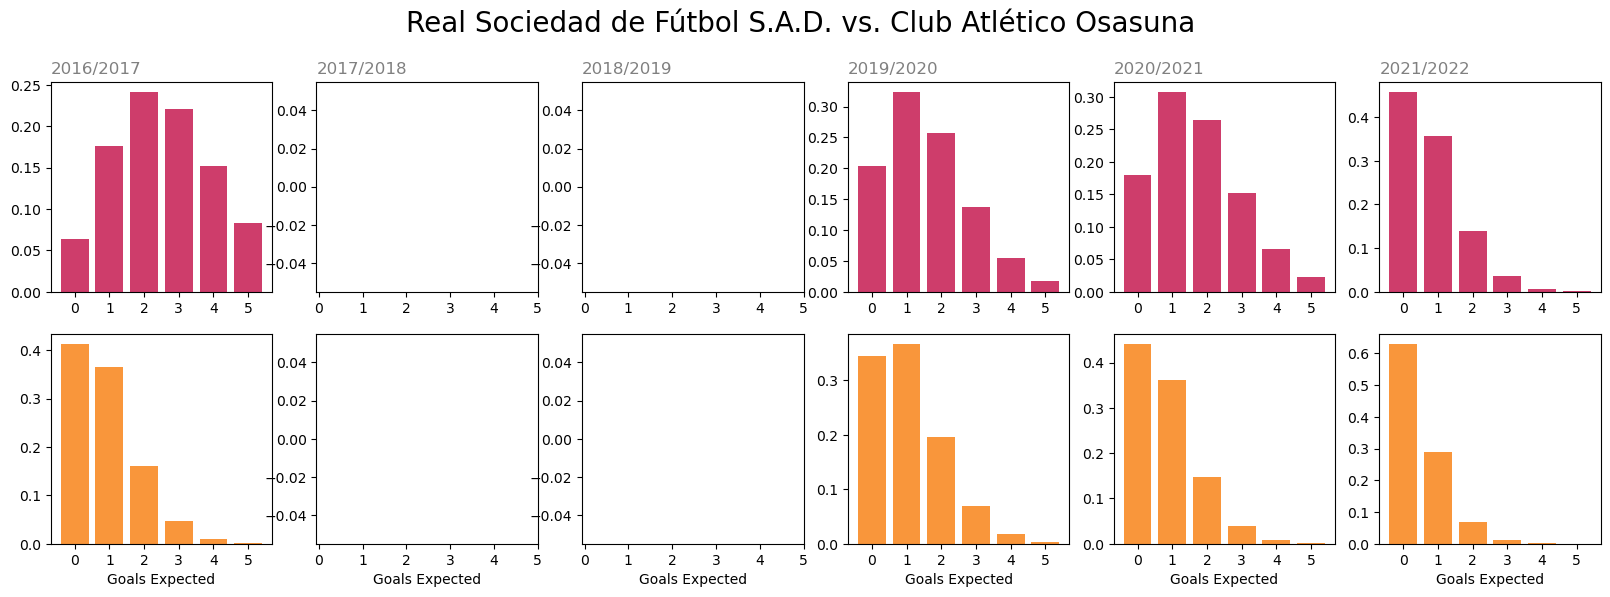

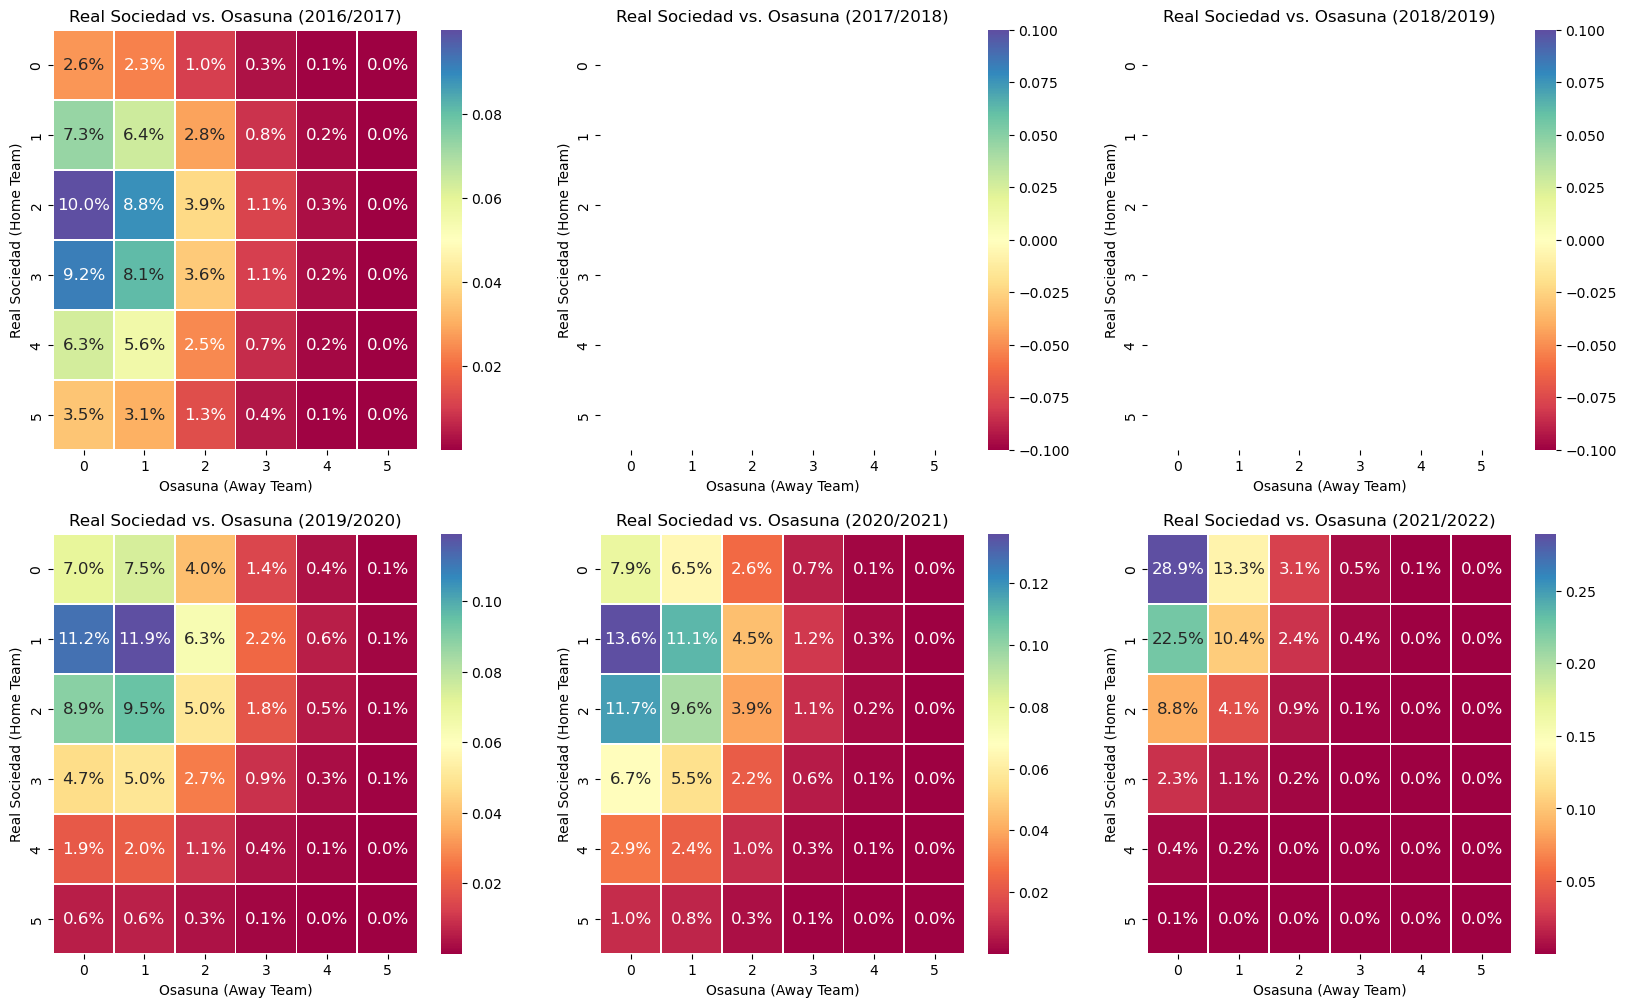

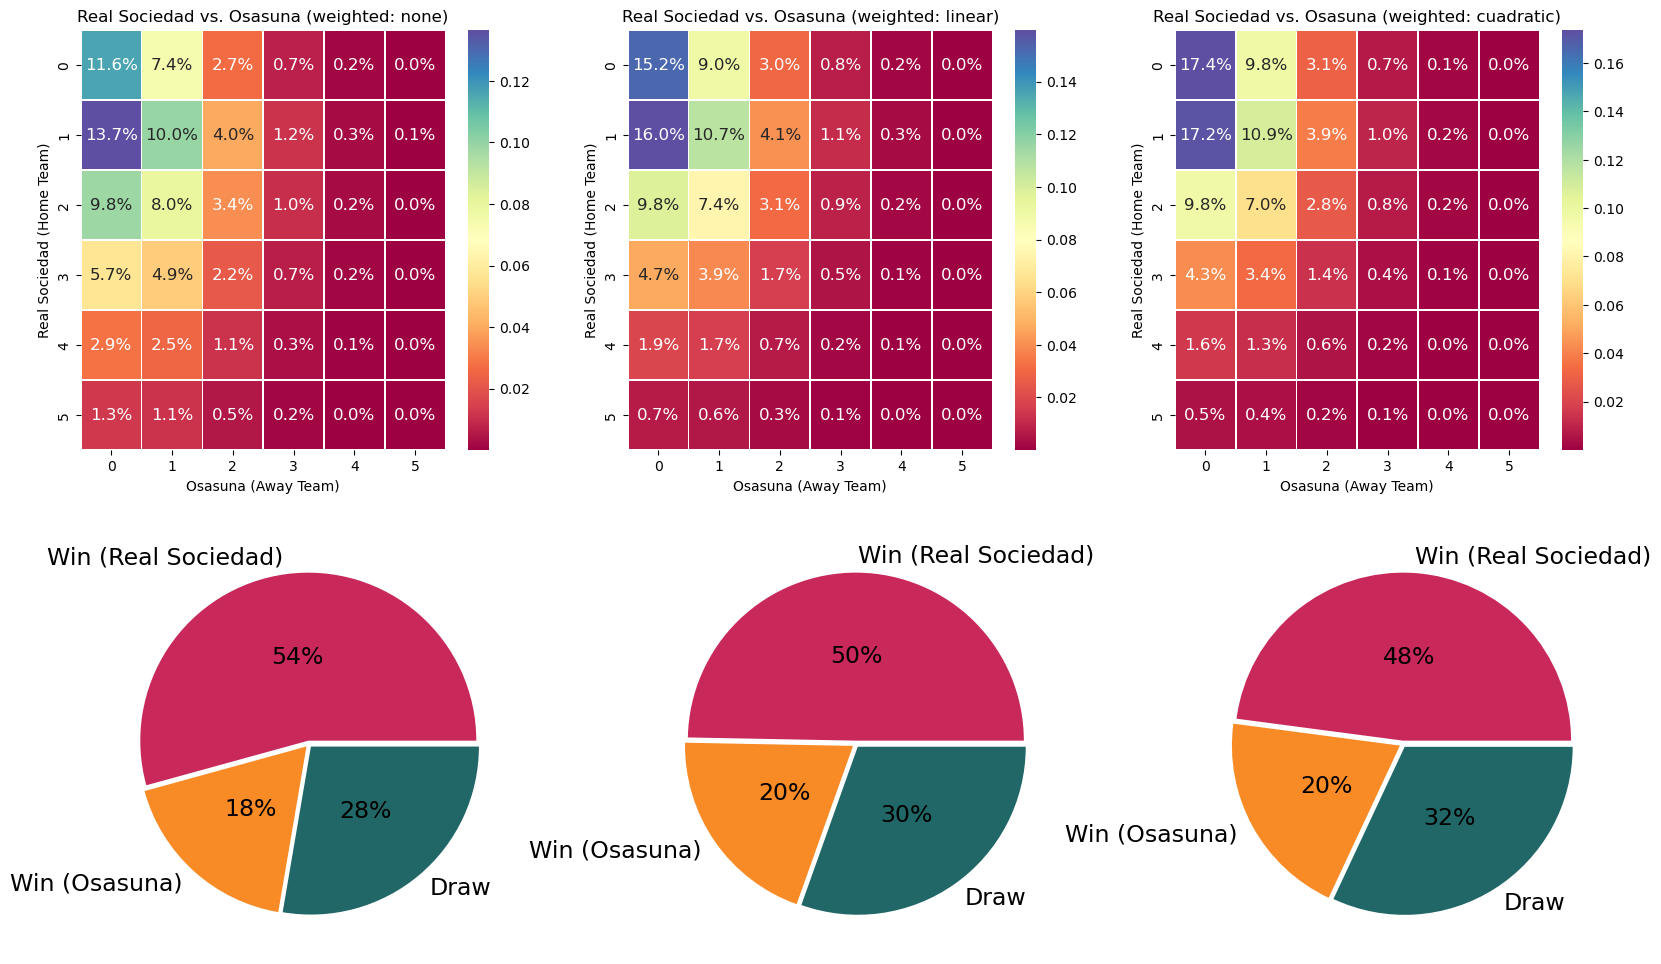

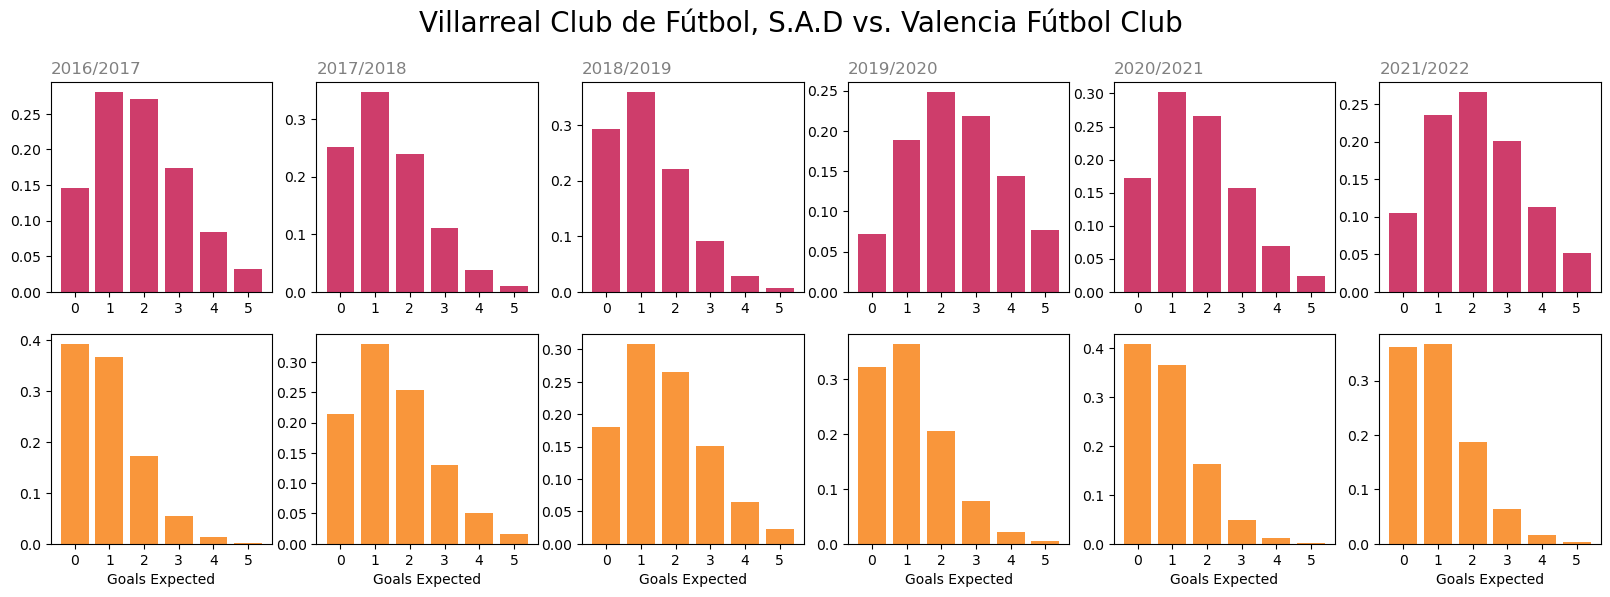

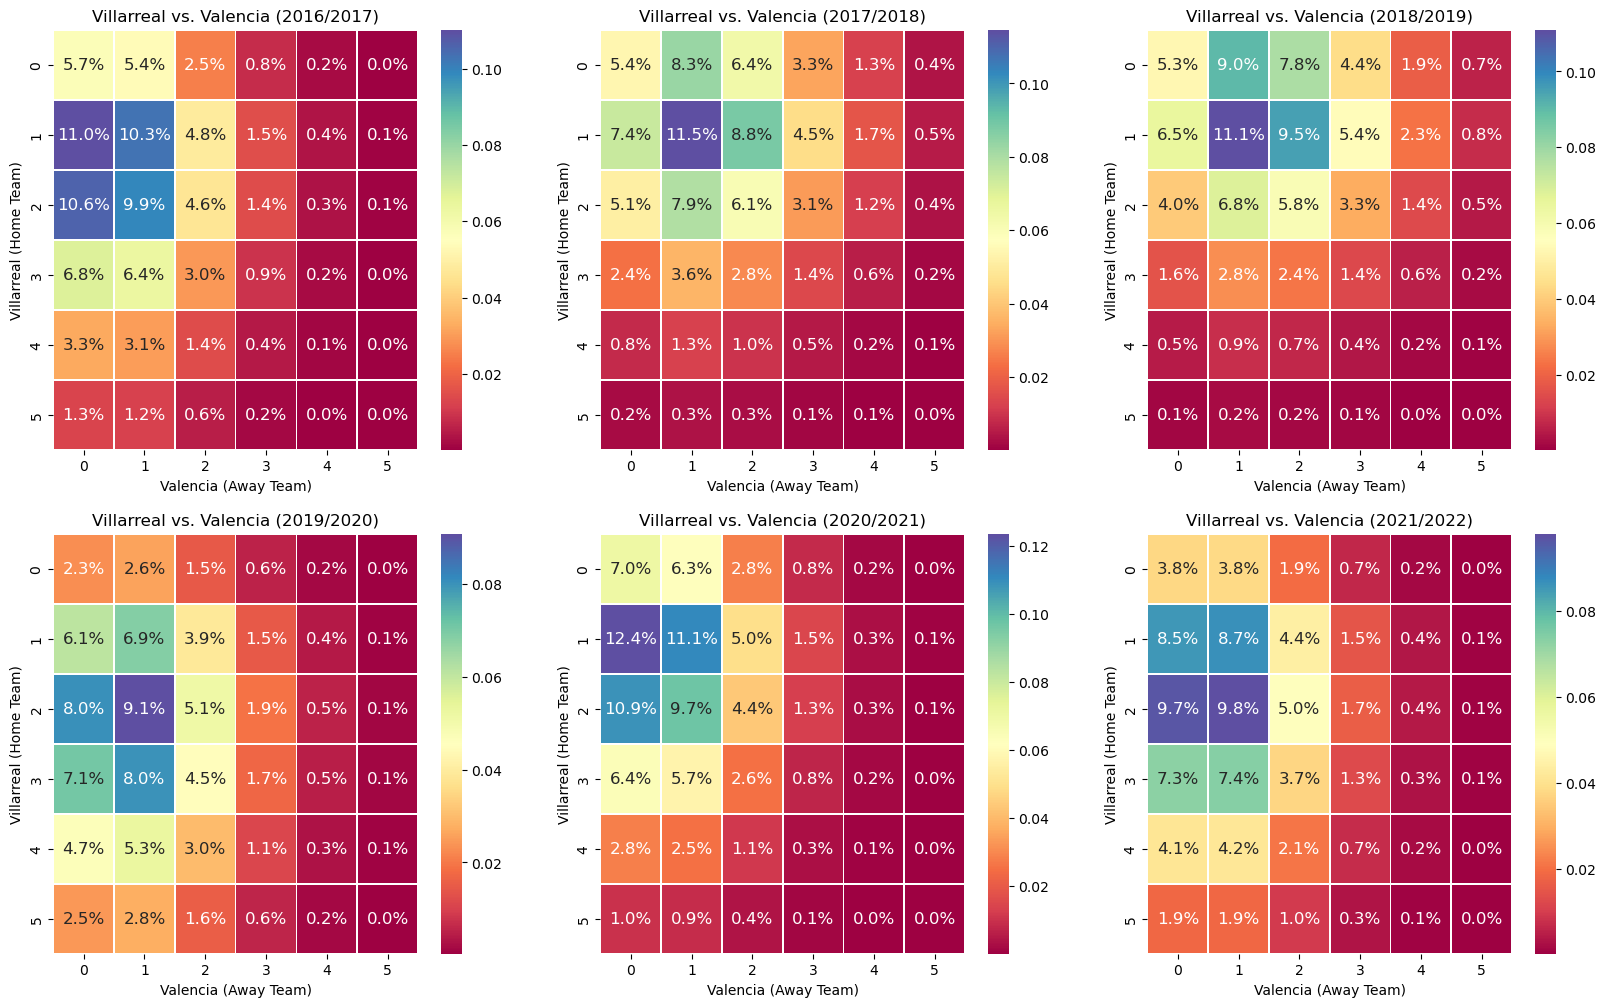

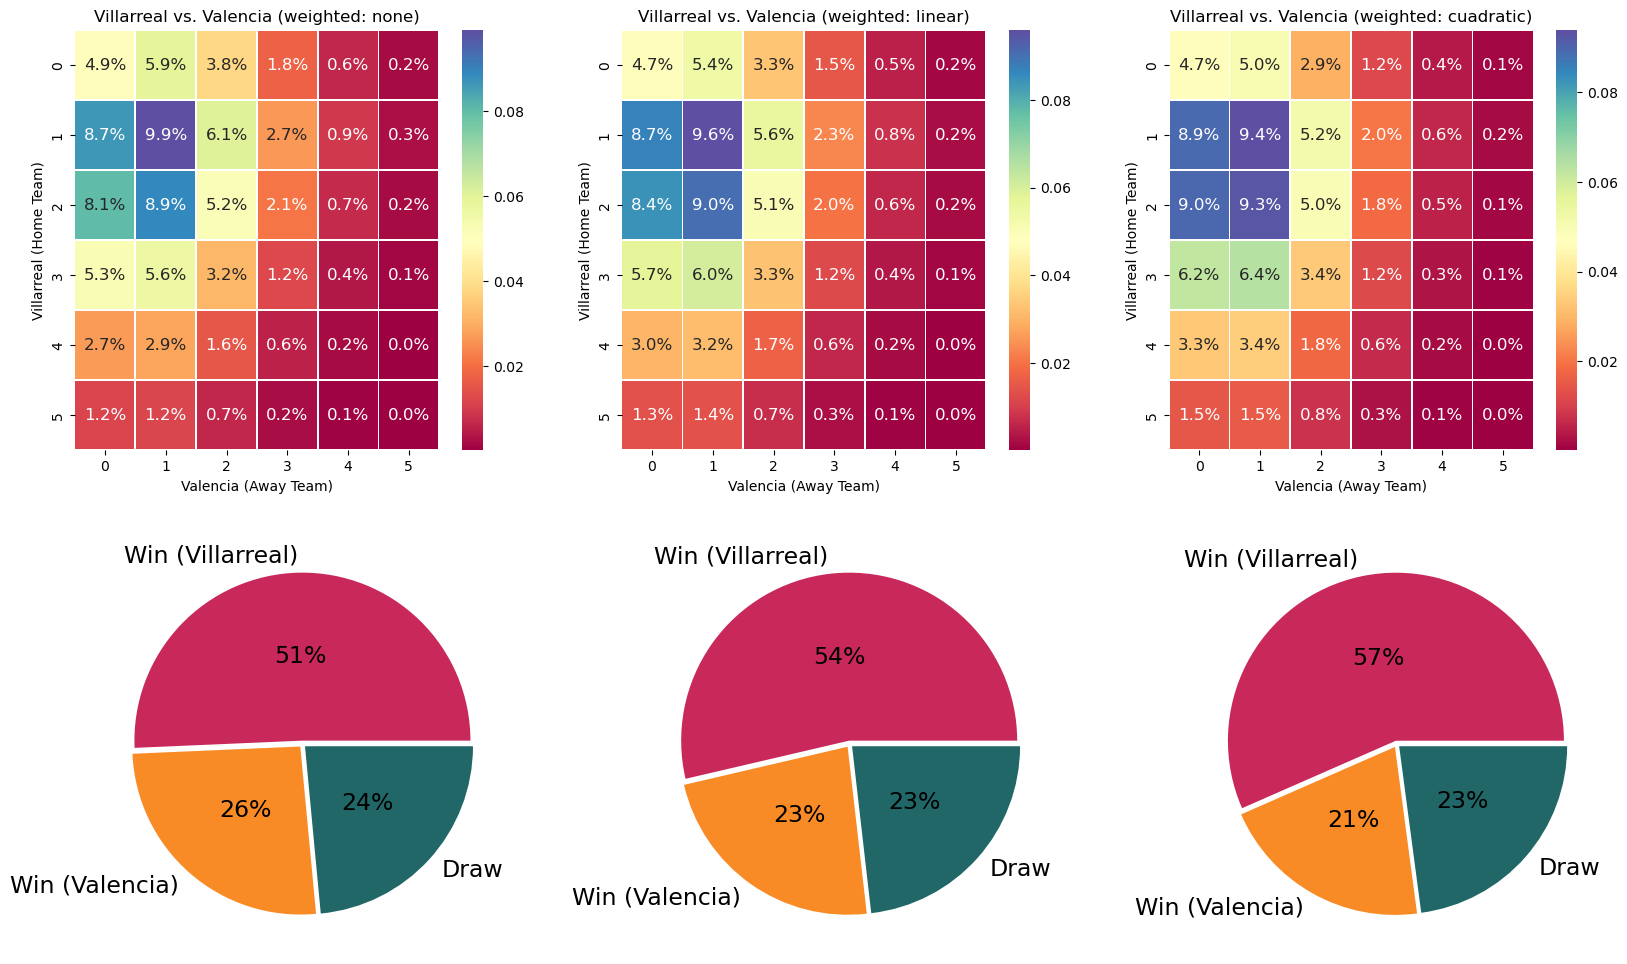

In [7]:
salida = []

seasons = ['2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021', '2021/2022']

for match in range(data_jornada.shape[0]):
    
    HT = data_jornada.iloc[match, 1]
    AT = data_jornada.iloc[match, 3]
    
    results = []

    for season in seasons:

        try:
            Hf = \
            pd.read_sql_query(
                sql = sql_hf_query(HT, season),
                con = con)['Hf'][0]
        except:
            Hf = npy.nan
        try:
            Af = \
            pd.read_sql_query(
                sql = sql_af_query(AT, season),
                con = con)['Af'][0]    
        except:
            Af = npy.nan
        try:
            Ac = \
            pd.read_sql_query(
                sql = sql_ac_query(AT, season),
                con = con)['Ac'][0]   
        except:
            Ac = npy.nan
        try:
            Hc = \
            pd.read_sql_query(
                sql = sql_hc_query(HT, season),
                con = con)['Hc'][0]           
        except:
            Hc = npy.nan
        try:
            THf = \
            pd.read_sql_query(
                sql = sql_thf_query(season),
                con = con)['THf'][0]
        except:
            THf = npy.nan
        try:
            TAf = \
            pd.read_sql_query(
                sql = sql_taf_query(season),
                con = con)['TAf'][0]     
        except:
            TAf = npy.nan
        try:
            TAc = \
            pd.read_sql_query(
                sql = sql_tac_query(season),
                con = con)['TAc'][0]   
        except:
            TAc = npy.nan
        try:
            THc = \
            pd.read_sql_query(
                sql = sql_thc_query(season),
                con = con)['THc'][0]       
        except:
            THc = npy.nan
            
        try: 
            FDRA = Ac/TAc # Fuerza Defensiva Relativa Away
        except:
            FDRA = npy.nan

        try: 
            GEH = (Hf/THf)*(Ac/TAc)*THf # Goles Esperados Home
        except:
            GEH = npy.nan

        try: 
            FARA = Af/TAf # Fuerza Atacante Relativa Away
        except:
            FARA = npy.nan

        try:
            FDRH = Hc/THc # Fuerza Defensiva Relativa Home
        except:
            FDRH = npy.nan

        try:
            FARH = Hf/THf # Fuerza Atacante Relativa Home
        except:
            FARH = npy.nan

        try: 
            GEA = (Af/TAf)*(Hc/THc)*THc # Goles Esperados Away
        except:
            GEA = npy.nan        

        results.append([Hf, THf, FARH, 
                        Ac, TAc, FDRA, 
                        GEH, 
                        Af, TAf, FARA, 
                        Hc, THc, FDRH, 
                        GEA]) 
        
    results = pd.DataFrame(results).T
    results.columns = seasons
    results.index = [
        'Media de Goles Realizados del Equipo Local',
        'Media de Goles Realizados de los Equipos Locales',
        'Fuerza Atacante Relativa del Equipo Local',

        'Media de Goles Recibidos del Equipo Visitante',
        'Media de Goles Recibidos de los Equipos Visitantes',
        'Fuerza Defensiva Relativa del Equipo Visitante',

        'Goles Esperados del Equipo Local',

        'Media de Goles Realizados del Equipo Visitante',
        'Media de Goles Realizados de los Equipos Visitantes',
        'Fuerza Atacante Relativa del Equipo Visitante',

        'Media de Goles Recibidos del Equipo Local',
        'Media de Goles Recibidos de los Equipos Locales',
        'Fuerza Defensiva Relativa del Equipo Local', 

        'Goles Esperados del Equipo Visitante']    
    
    fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(nrows = 2, ncols = 6, figsize = (20, 6))

    for s, ax in zip(seasons, [ax1, ax2, ax3, ax4, ax5, ax6]):
        m = results.loc['Goles Esperados del Equipo Local', [s]][0]
        g_ = [0, 1, 2, 3, 4, 5]
        p_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
        ax.bar(g_, p_, alpha = 0.9, color = '#c9285b')
        ax.set_xticks([0,1,2,3,4,5])

        ax.set_title(s, loc ='left', color = '0.5')

    for s, ax in zip(seasons, [ax7, ax8, ax9, ax10, ax11, ax12]):
        m = results.loc['Goles Esperados del Equipo Visitante', [s]][0]
        g_ = [0, 1, 2, 3, 4, 5]
        p_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))
        ax.bar(g_, p_, alpha = 0.9, color = '#f98b26')
        ax.set_xticks([0,1,2,3,4,5]) 
        ax.set_xlabel(r'Goals Expected')

    fig.suptitle(t = f"{dict_teams[HT]['fullname']} vs. {dict_teams[AT]['fullname']}", y = 1.0, fontsize = 20)
    plt.show()    
    
    
    prediction = []

    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))

    for s, ax in zip(seasons, [ax1, ax2, ax3, ax4, ax5, ax6]):
        
        try:
            m = results.loc['Goles Esperados del Equipo Local', [s]][0]
            g_ = [0, 1, 2, 3, 4, 5]
            p_local_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))

            m = results.loc['Goles Esperados del Equipo Visitante', [s]][0]
            g_ = [0, 1, 2, 3, 4, 5]
            p_visitante_ = list(map(lambda x: (npy.exp(-m) * m**x) / npy.math.factorial(x), g_))

            df_to_heatmap = \
                pd.DataFrame({
                    '0': [p_visitante_[0] * x for x in p_local_],
                    '1': [p_visitante_[1] * x for x in p_local_],
                    '2': [p_visitante_[2] * x for x in p_local_],
                    '3': [p_visitante_[3] * x for x in p_local_],
                    '4': [p_visitante_[4] * x for x in p_local_],
                    '5': [p_visitante_[5] * x for x in p_local_]}, 
                index = ['0','1','2','3','4','5'])

            prediction.append(df_to_heatmap)

            g = sns.heatmap(df_to_heatmap, ax = ax, annot = True, annot_kws = {"size": 12}, fmt = ".1%", 
                            linewidths = 0.5, cmap = 'Spectral')#'Spectral')
            g.set(xlabel = f'{AT} (Away Team)', ylabel = f'{HT} (Home Team)', title = f"{HT} vs. {AT} ({s})")    
        except:
            None
    plt.show()
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3, figsize = (20, 12))

    for ax, estimation in zip([ax1, ax2, ax3], ['none', 'linear', 'cuadratic']):

        dfestimation = prediction[0].fillna(0)*w([1,2,3,4,5,6], estimation)[0]
        for i_ in [1,2,3,4,5]:
            dfestimation = dfestimation + prediction[i_].fillna(0)*w([1,2,3,4,5,6], estimation)[i_]
            
        k = npy.sum([x*y for x,y in zip([ 1 if not npy.isnan(x.iloc[0,0]) else 0 for x in prediction], w([1,2,3,4,5,6], estimation))])
        dfestimation = dfestimation / k

        g = sns.heatmap(dfestimation, ax = ax, annot = True, annot_kws = {"size": 12}, fmt = ".1%", 
                        linewidths = 0.5, cmap = 'Spectral')#'Spectral')
        g.set(xlabel = f'{AT} (Away Team)', ylabel = f'{HT} (Home Team)', title = f"{HT} vs. {AT} (weighted: {estimation})")

    for ax, estimation in zip([ax4, ax5, ax6], ['none', 'linear', 'cuadratic']):    

        dfestimation = prediction[0].fillna(0)*w([1,2,3,4,5,6], estimation)[0]
        for i_ in [1,2,3,4,5]:
            dfestimation = dfestimation + prediction[i_].fillna(0)*w([1,2,3,4,5,6], estimation)[i_]
        
        k = npy.sum([x*y for x,y in zip([ 1 if not npy.isnan(x.iloc[0,0]) else 0 for x in prediction], w([1,2,3,4,5,6], estimation))])
        dfestimation = dfestimation / k

        mask_win_away = npy.ones(dfestimation.shape, dtype = 'bool')
        mask_win_away[npy.tril_indices(len(dfestimation))] = False
        probability_win_away = npy.sum(npy.sum(dfestimation.mask(~mask_win_away)))

        mask_win_home = npy.ones(dfestimation.shape, dtype = 'bool')
        mask_win_home[npy.triu_indices(len(dfestimation))] = False
        probability_win_home = npy.sum(npy.sum(dfestimation.mask(~mask_win_home)))

        probability_draw = 1.0 - probability_win_home - probability_win_away

        ax.pie([probability_win_home, probability_win_away, probability_draw],
               explode = [0.02, 0.02, 0.02],
               autopct = '%1.0f%%',
               colors = ['#c9285b', '#f98b26', '#216767'],
               pctdistance = 0.5,
               labeldistance = 1.1,
               textprops = {'fontsize': 17},
               labels = [f'Win ({HT})',
                         f'Win ({AT})',
                         'Draw'])  
        
    plt.show()    
    
    salida.append([HT, AT, probability_win_home, probability_win_away, probability_draw])

In [8]:
def PFTR(x,y,z):
    if (x>y) & (x>z):
        return 'H'
    if (y>x) & (y>z):
        return 'A'
    if (z>x) & (z>y):
        return 'D'

In [9]:
salida = \
    pd.DataFrame(salida, columns = ['Home', 'Away', 'Win (Home)', 'Win (Away)', 'Draw'])

salida['FTR'] = [PFTR(x,y,z) for x,y,z in zip(salida['Win (Home)'], salida['Win (Away)'], salida['Draw'])]
salida

Home         Away  Win (Home)  Win (Away)      Draw FTR
0         Girona         Rayo    0.391648    0.324757  0.283595   H
1          Betis     Athletic    0.440524    0.272451  0.287024   H
2       Atlético        Elche    0.722023    0.082627  0.195350   H
3         Getafe     Mallorca    0.613433    0.141556  0.245011   H
4          Celta      Sevilla    0.275848    0.440396  0.283757   A
5          Cádiz      Almería    0.000000    0.000000  1.000000   D
6     Valladolid  Real Madrid    0.112775    0.654385  0.232840   A
7      Barcelona     Espanyol    0.733306    0.077173  0.189522   H
8  Real Sociedad      Osasuna    0.479125    0.201176  0.319698   H
9     Villarreal     Valencia    0.565777    0.205227  0.228996   H

In [33]:
pd.concat([salida, data_jornada], axis = 1)\
    .iloc[:, [6,0,1,2,3,4,5]]\
    .style\
    .bar(subset=['Win (Home)','Win (Away)','Draw'], color = '#c9285bAA', vmax = 1.2,)\
    .format(precision = 2)

In [97]:
con.close()